In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing data
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Structure of Data 

In [6]:
# shape of the data

np.shape(data)

(1470, 35)

In [7]:
# checking data types 
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
# statistical summary of the data ; for numericals
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# statistical summary of the data ; for categoricals
data.describe(include = "object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [10]:
# summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Data Cleaning

In [12]:
# checking duplicate records
data.duplicated().sum()

0

In [13]:
# checking null/missing records
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## EDA (Exploratory Data Analysis)

In [15]:
# checking for employee attrition 
attrition = data["Attrition"].value_counts()
attrition

Attrition
No     1233
Yes     237
Name: count, dtype: int64

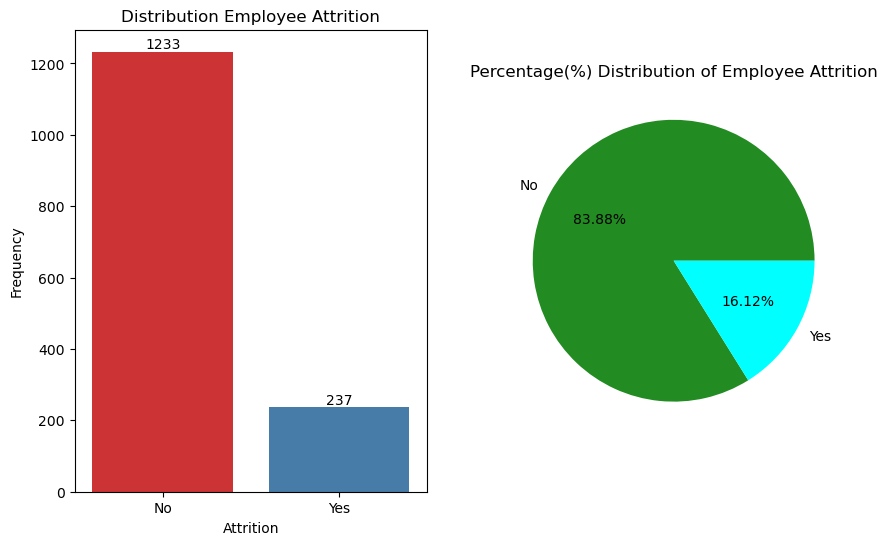

In [16]:
# plotting totol number of emp.attrition and their percentage of it.

plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
bar_plot = sns.barplot(x = attrition.index, y = attrition.values, palette = "Set1")
for label in bar_plot.containers:
    bar_plot.bar_label(label)
plt.title("Distribution Employee Attrition")
plt.xlabel("Attrition")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.pie(attrition, labels = attrition.index, autopct = "%.2f%%",
        colors = ["forestgreen","cyan"])
plt.title("Percentage(%) Distribution of Employee Attrition")

plt.show()

Total ``237`` is employees are leaving the company attrition rate is ``16.12%`` and ``1233`` employees are not leaving the company which is ``83.88%`` employees are stayed and they comfortable with the company.

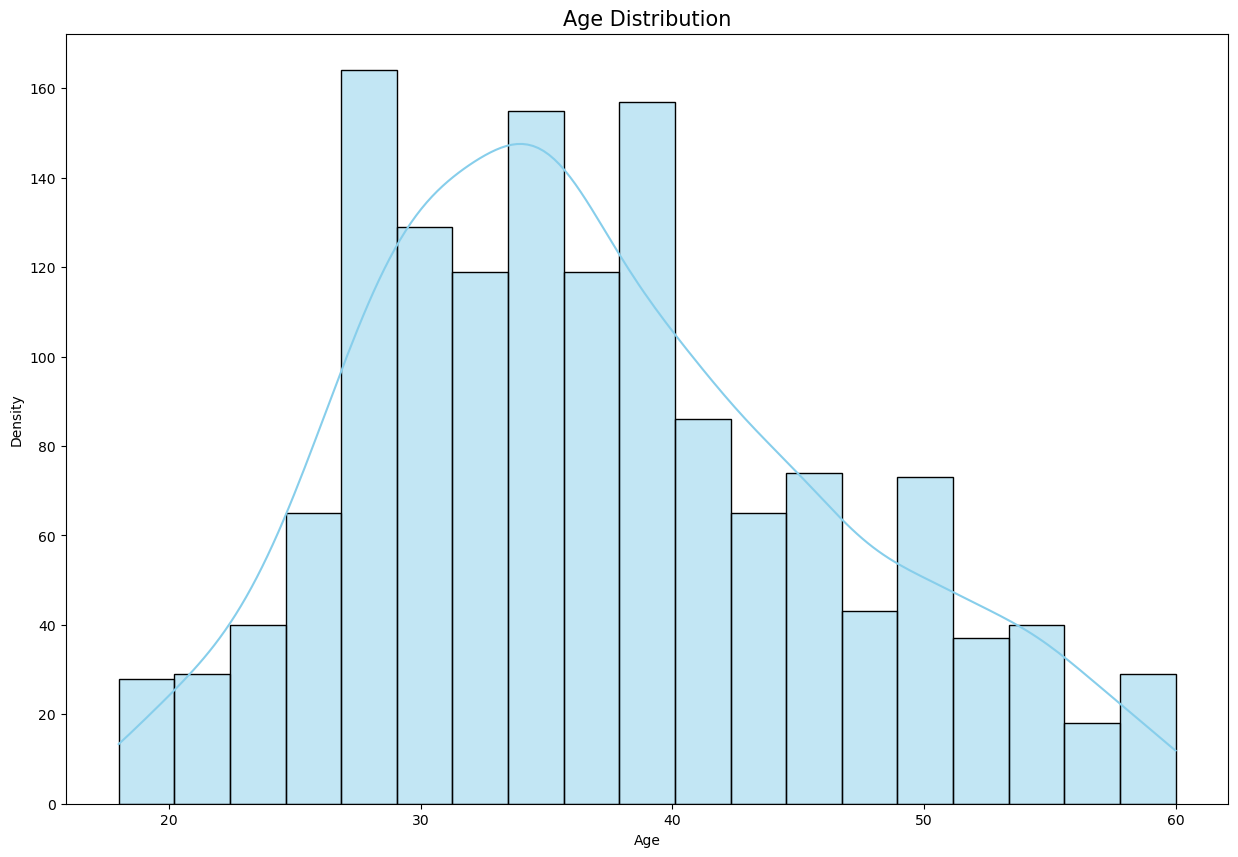

In [18]:
# Plotting employee's age distribution

plt.figure(figsize = (15,10))
sns.histplot(data["Age"], color = "skyblue", kde = True)
plt.title ("Age Distribution", fontsize = 15)
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

Most number of employee are in the ``25-35`` age group in the company. It shows the employee are very productive and  experienced in this age group.

In [20]:
# checking for gender group 
gender = data["Gender"].value_counts()
gender

Gender
Male      882
Female    588
Name: count, dtype: int64

In [21]:
# checking for marital status
marital_stu = data["MaritalStatus"].value_counts()
marital_stu

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

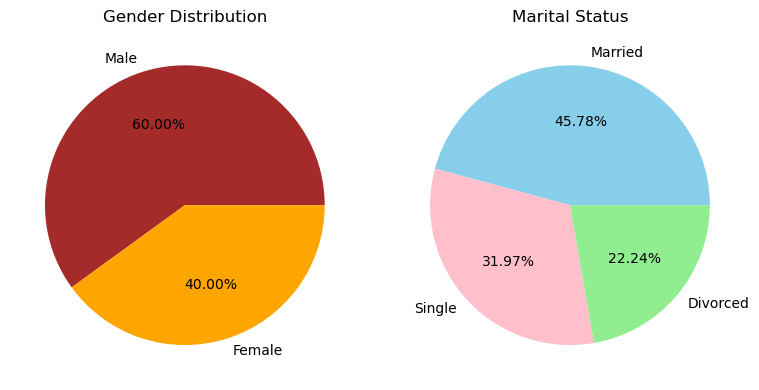

In [22]:
# Plotting Marital status and Distribution of gender

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
plt.pie(gender, labels = gender.index, autopct = "%.2f%%",
        colors = ["brown","orange"])
plt.title("Gender Distribution")
plt.tight_layout()


plt.subplot(1,2,2)
plt.pie(marital_stu, labels = marital_stu.index, autopct = "%.2f%%",
       colors = ["skyblue","pink","lightgreen"])
plt.title("Marital Status")
plt.tight_layout()

plt.show()

- In terms of gender 882 are males and 588 are females which is  ``60% males`` and ``40% females``
- About marital status majority of employee's are ``married`` which is 673 **(45.78%)** and ``Singles`` are 470 **(31.97%)** remain are ``Divorced`` 327 **(22.24%)** in the company.

In [24]:
# checking traveling frequency of an employee
travel_freq = data["BusinessTravel"].value_counts()
travel_freq

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

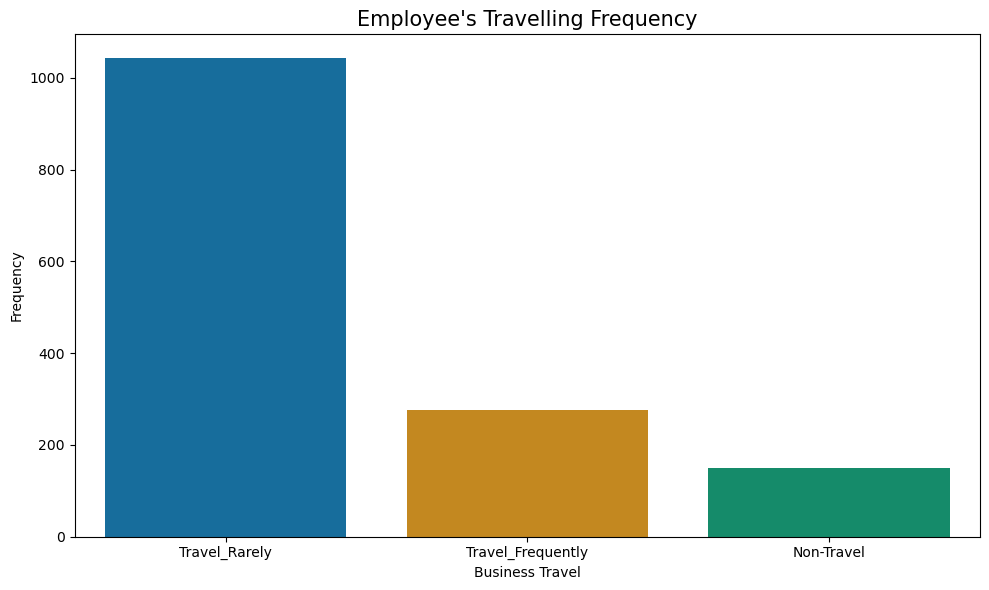

In [25]:
# Plotting employee's travelling frequency

plt.figure(figsize = (10,6))
sns.barplot(x = travel_freq.index, y = travel_freq.values, palette = "colorblind")
plt.title("Employee's Travelling Frequency", fontsize = 15)
plt.xlabel("Business Travel")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Here the above barchart shows employee's who are travel due to business perpose, most number of employee are rearly travel and very less employees are frequently travel. Hence, non-travel emplyees are < 200.

In [27]:
# checking education field of an employee
education = data["EducationField"].value_counts()
education

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

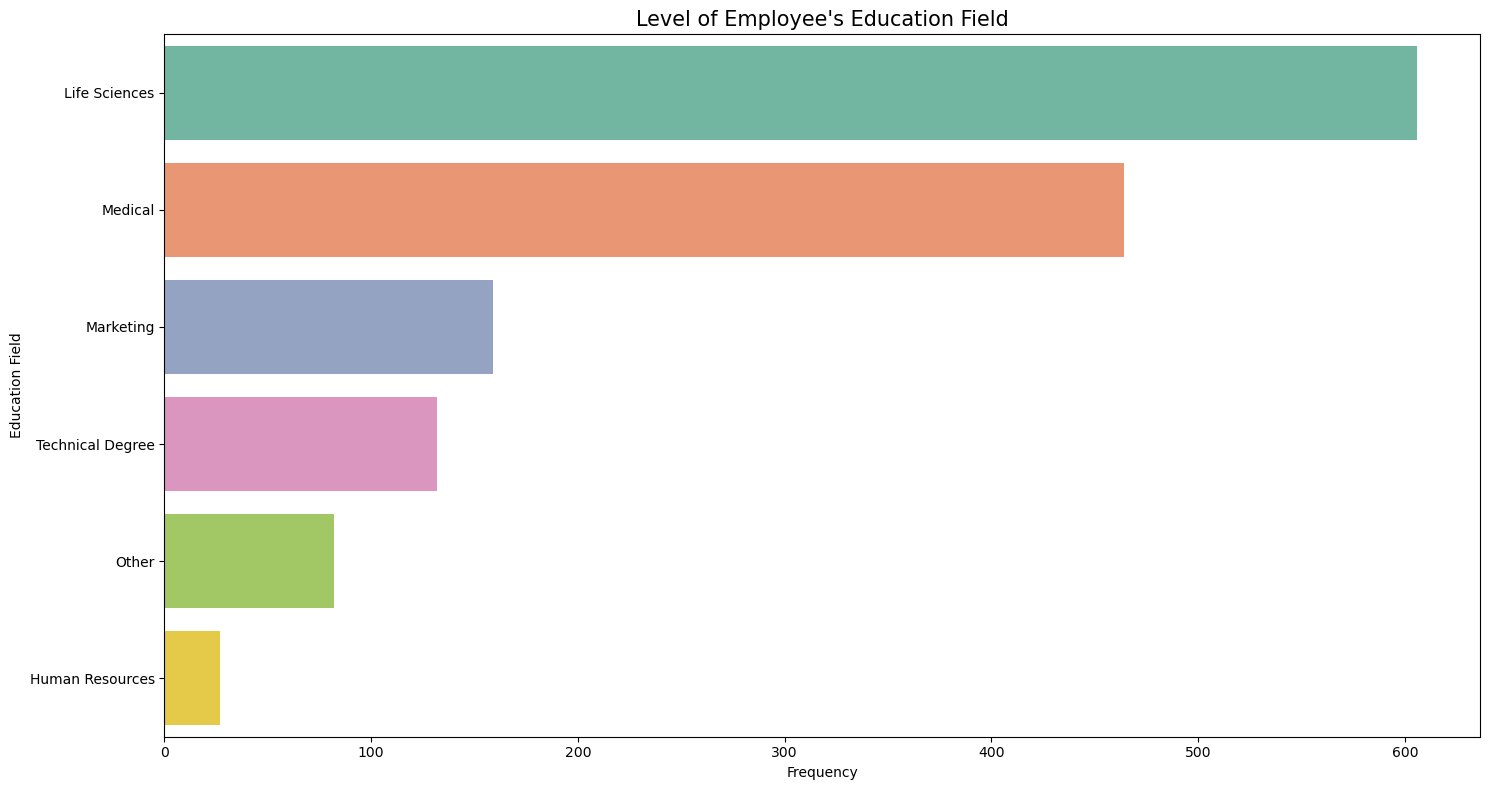

In [28]:
# Plotting education field of an employee

plt.figure(figsize = (15,8))
sns.barplot(y = education.index, x = education.values, palette = "Set2")
plt.title("Level of Employee's Education Field", fontsize = 15)
plt.xlabel("Frequency")
plt.ylabel("Education Field")
plt.tight_layout()
plt.show()

Employee's highest level of education is from various field like Most number of employees are in life sciences, medical and marketing. 

In [30]:
# checking working department of an employee
dept = data["Department"].value_counts()
dept

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

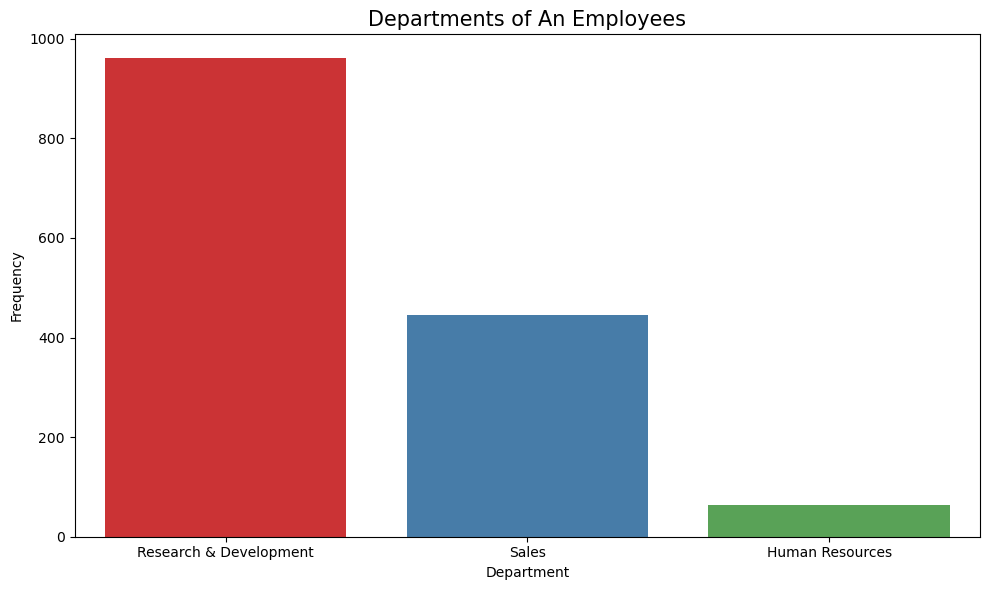

In [31]:
# Plotting employee's department

plt.figure(figsize = (10,6))
sns.barplot(x = dept.index, y = dept.values, palette = "Set1")
plt.title("Departments of An Employees", fontsize = 15)
plt.xlabel("Department")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Highest number of employee's are working in Research & Development (R & D) department and rest of all are working in Sales and HR(Human Resource) Department.

In [33]:
# looking for various job roles employees are working in.

job_role = data["JobRole"].value_counts()
job_role

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

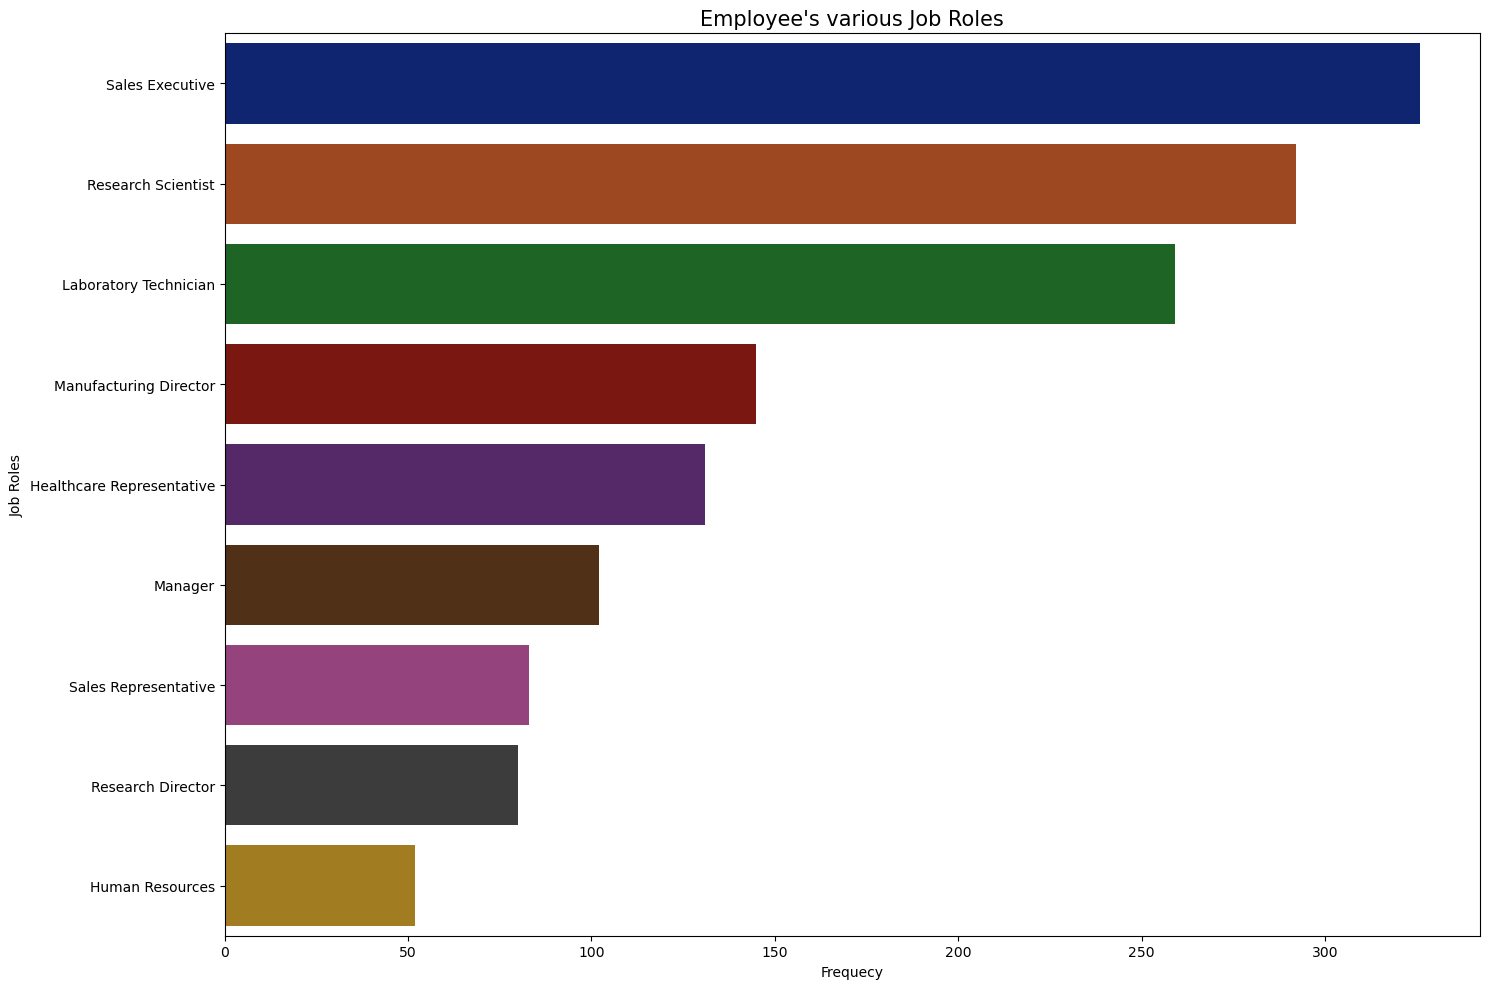

In [34]:
# plotting employees most favourable job roles in the company 

plt.figure(figsize = (15,10))
sns.barplot(x = job_role.values, y = job_role.index, palette = "dark")
plt.title("Employee's various Job Roles", fontsize = 15) 
plt.xlabel("Frequecy")
plt.ylabel("Job Roles")
plt.tight_layout()
plt.show()

So, Sales Executive are the most common job role where most number of employee's are working in also few more as well common job roles is there such as Research Scientist, Lab.Technician, Manufacturing Director and Healthcare Representative kind of job roles are dominating in the company.

In [36]:
# Average tenure(how long employee stays at company) for employees

emp_tenure = data["YearsAtCompany"].mean()

In [37]:
print(f"The average duration employees have stayed with the company is {emp_tenure} years.")

The average duration employees have stayed with the company is 7.0081632653061225 years.


- Empoyees average tenure in the company is ``7.01 years``. Which shows many employees are comfortable with company and it's culture and associated with the company for long a time it also shows the consistency of the company.

####  Attrition Rate - Only employees who are left the company.

In [40]:
# only employees who are left the company ; Attrition Rate

data_attrition = data[data["Attrition"] == "Yes"]
data_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3


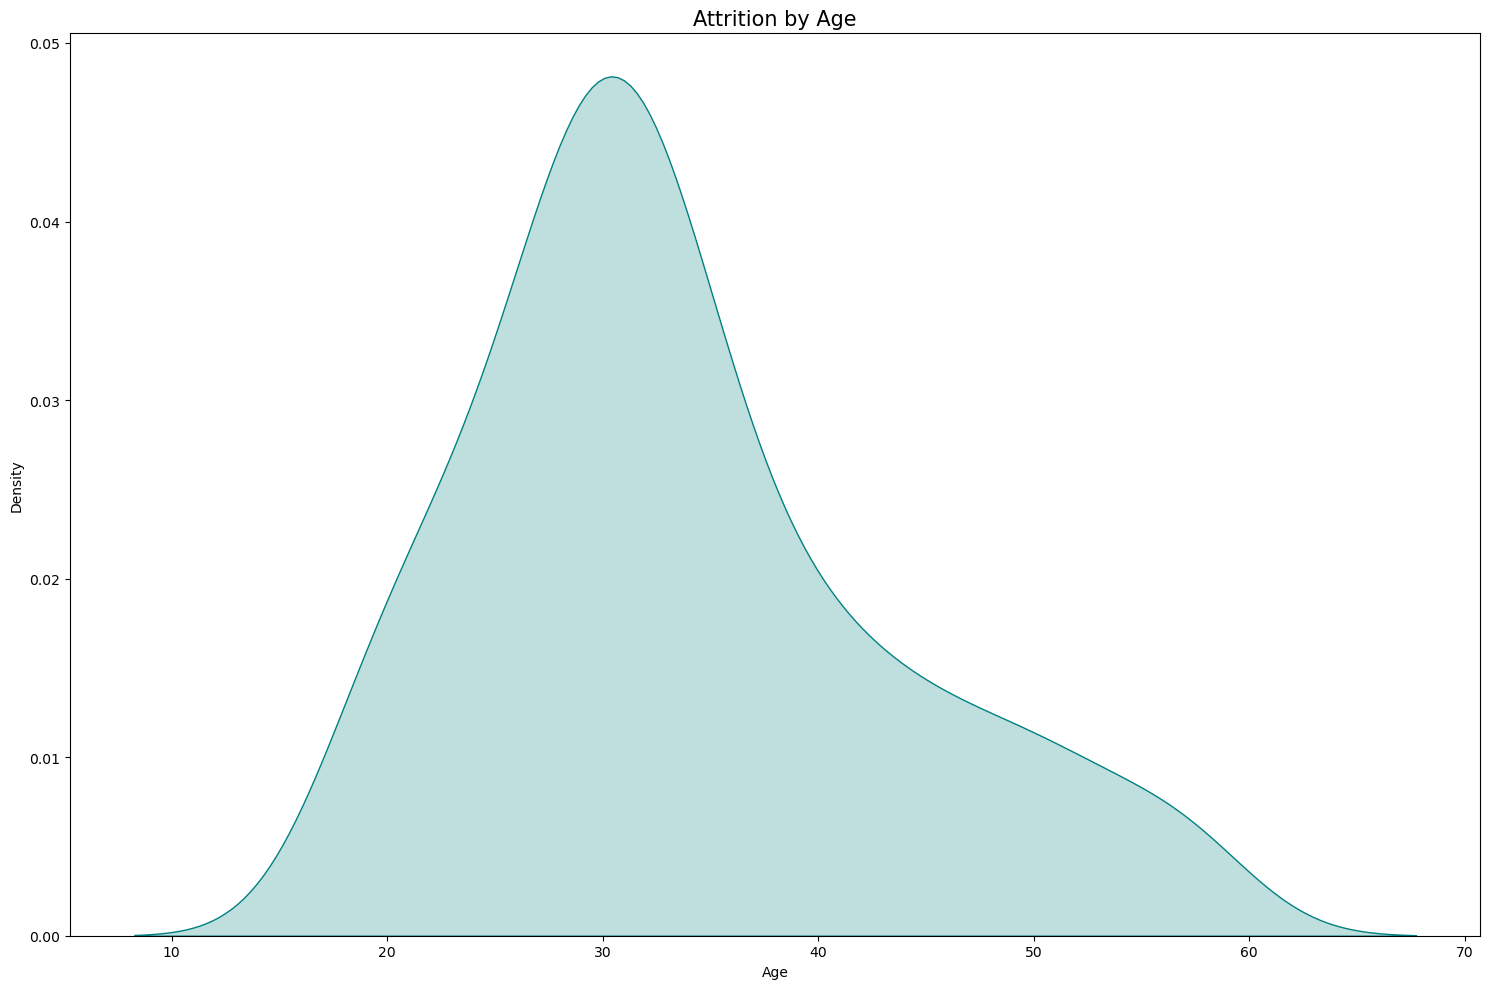

In [41]:
# Highest Attrition by most common age group

plt.figure(figsize = (15,10))
sns.kdeplot(data_attrition["Age"],fill = True, color = "#008080")
plt.title("Attrition by Age", fontsize = 15)
plt.xlabel("Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

For attrition by age, the most common age group is ``25-35``. Where most employees are left the company.

In [43]:
# Attrition by Gender
gender_attrition = data_attrition["Gender"].value_counts()
gender_attrition

Gender
Male      150
Female     87
Name: count, dtype: int64

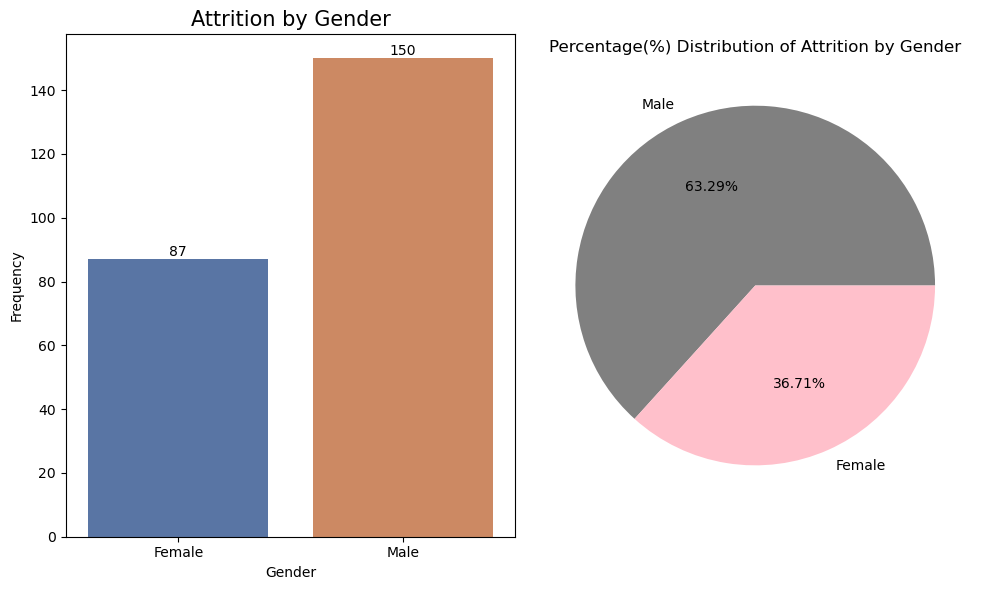

In [44]:
# Plotting Distribution for Attrition of employee by gender
# Plotting Distribution precentage(%) Attrition of employee by gender

plt.figure(figsize = (10,6))

plt.subplot(1,2,1)
cnt_plot = sns.countplot(x = data_attrition["Gender"], palette = "deep")
for label in cnt_plot.containers:
    cnt_plot.bar_label(label)
plt.title("Attrition by Gender", fontsize = 15)
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.tight_layout()

plt.subplot(1,2,2)
plt.pie(gender_attrition, labels = gender_attrition.index, autopct = "%.2f%%",
       colors = ["grey","pink"])
plt.title("Percentage(%) Distribution of Attrition by Gender")
plt.tight_layout()

plt.show()

- Total ``87`` is employees are ``female`` their attrition rate(%) is ``36.71%`` and ``150`` employees are ``male`` their attrition rate(%) is ``63.29%``.
- Which shows most of the males are leaving the company whereas female ratio is bit-low compare to male but for both who left the company is seems like they are not comfortable with the company or maybe another factor is responsible. 

### Compare & Analyse Data In Terms of  Attrition
#### (For Numericals)

In [47]:
def attrition_comparison_num(attrition_col, data_col):
    
    fig, axes = plt.subplots(1,2, figsize = (17,10))
    
    sns.boxplot(x = data[attrition_col], y = data[data_col],ax = axes[0],
               palette = "deep")
    axes[0].set_title(f"Comparision Between {attrition_col} v/s {data_col}",fontsize = 17)
    axes[0].set_xlabel(attrition_col) 
    axes[0].set_ylabel(f"Frequecncy of {data_col}")
    plt.tight_layout()
    
    sns.histplot(data[data_col], ax = axes[1], kde = True, color = "grey") 
    axes[1].set_title(f"Distribution of {data_col}",fontsize = 17)
    axes[1].set_xlabel(data_col) 
    axes[1].set_ylabel("Frequecncy")
    plt.tight_layout()
    
    plt.show()

- **By Age**

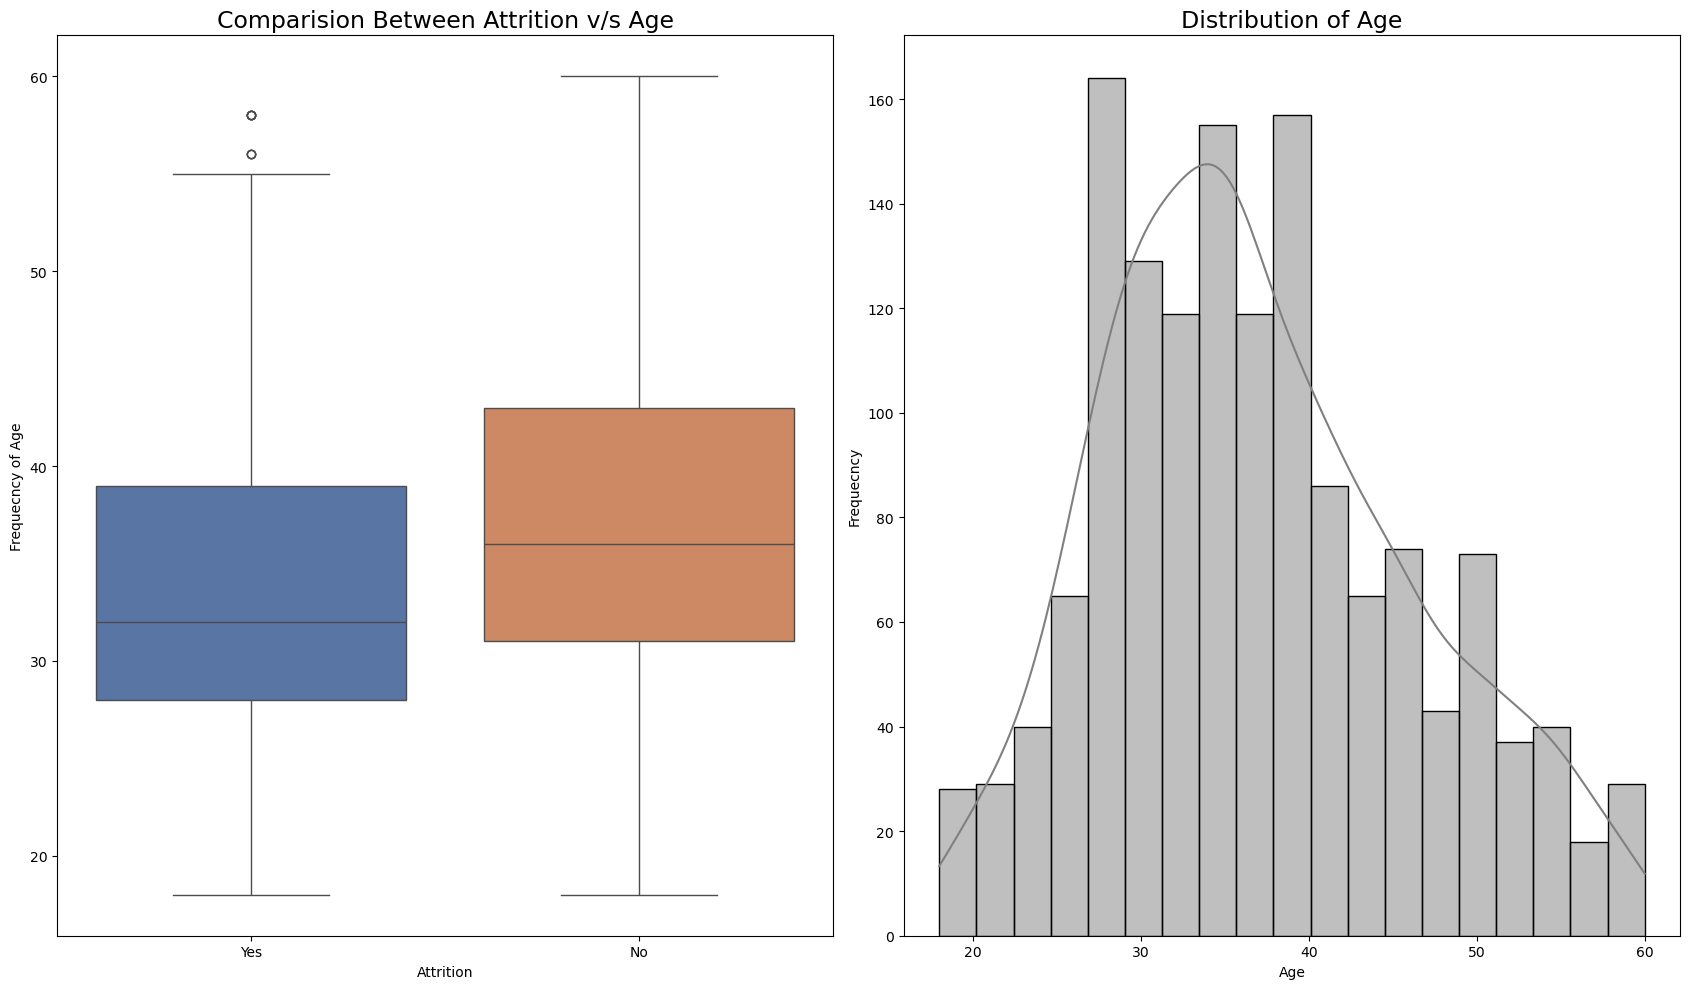

In [49]:
# compares employees age and their nature towards attrition 

attrition_comparison_num("Attrition","Age")

- As we have seen earlier, we know median age group is 25-35.
- On boxplot we can say that between age and attrition the employee's are leaving the job majority of them their age is less than 40 and those who didn't left their age bracket is 32 to 42.

- **By Hourly Rate**

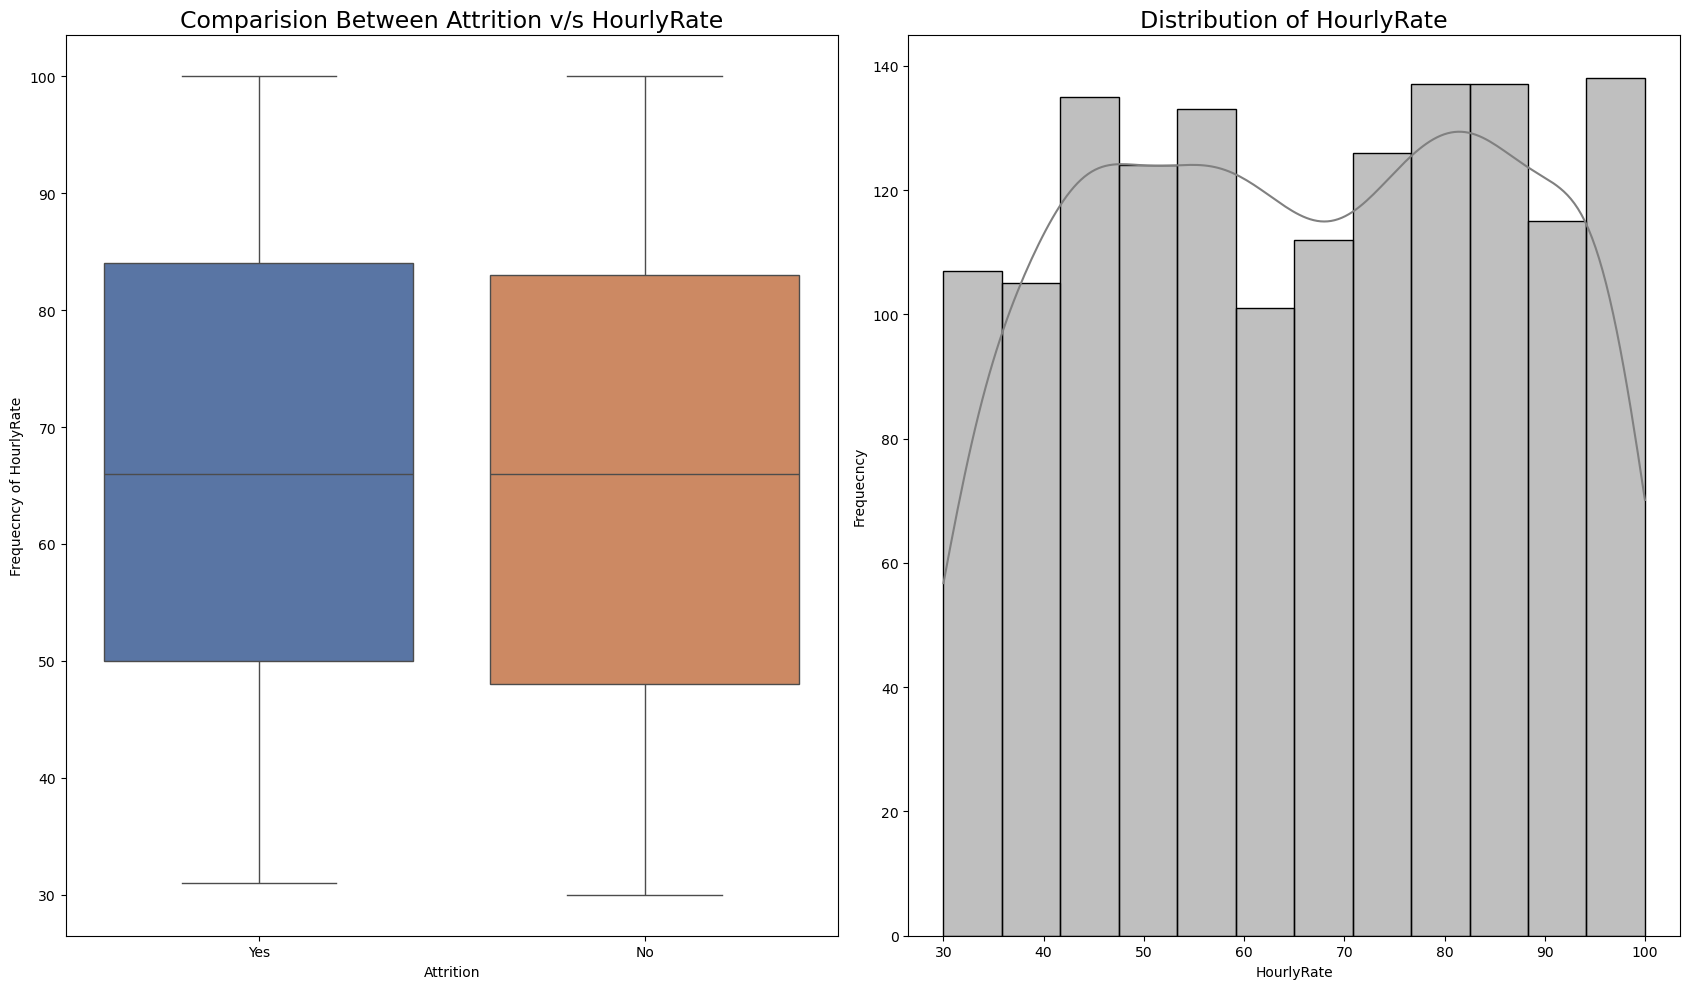

In [52]:
# compares employees hourly rate and their nature towards attrition 

attrition_comparison_num("Attrition","HourlyRate")

- The relation between hourly rate and attriton of an employee's is almost equal.
- We can said that there is no significant difference between hourly rate and attrition.
    - so, attrition of an employee's is not depend on hourly rate. It's not the major reason for employee's to leaving the company.  

- **By Daily Rate**

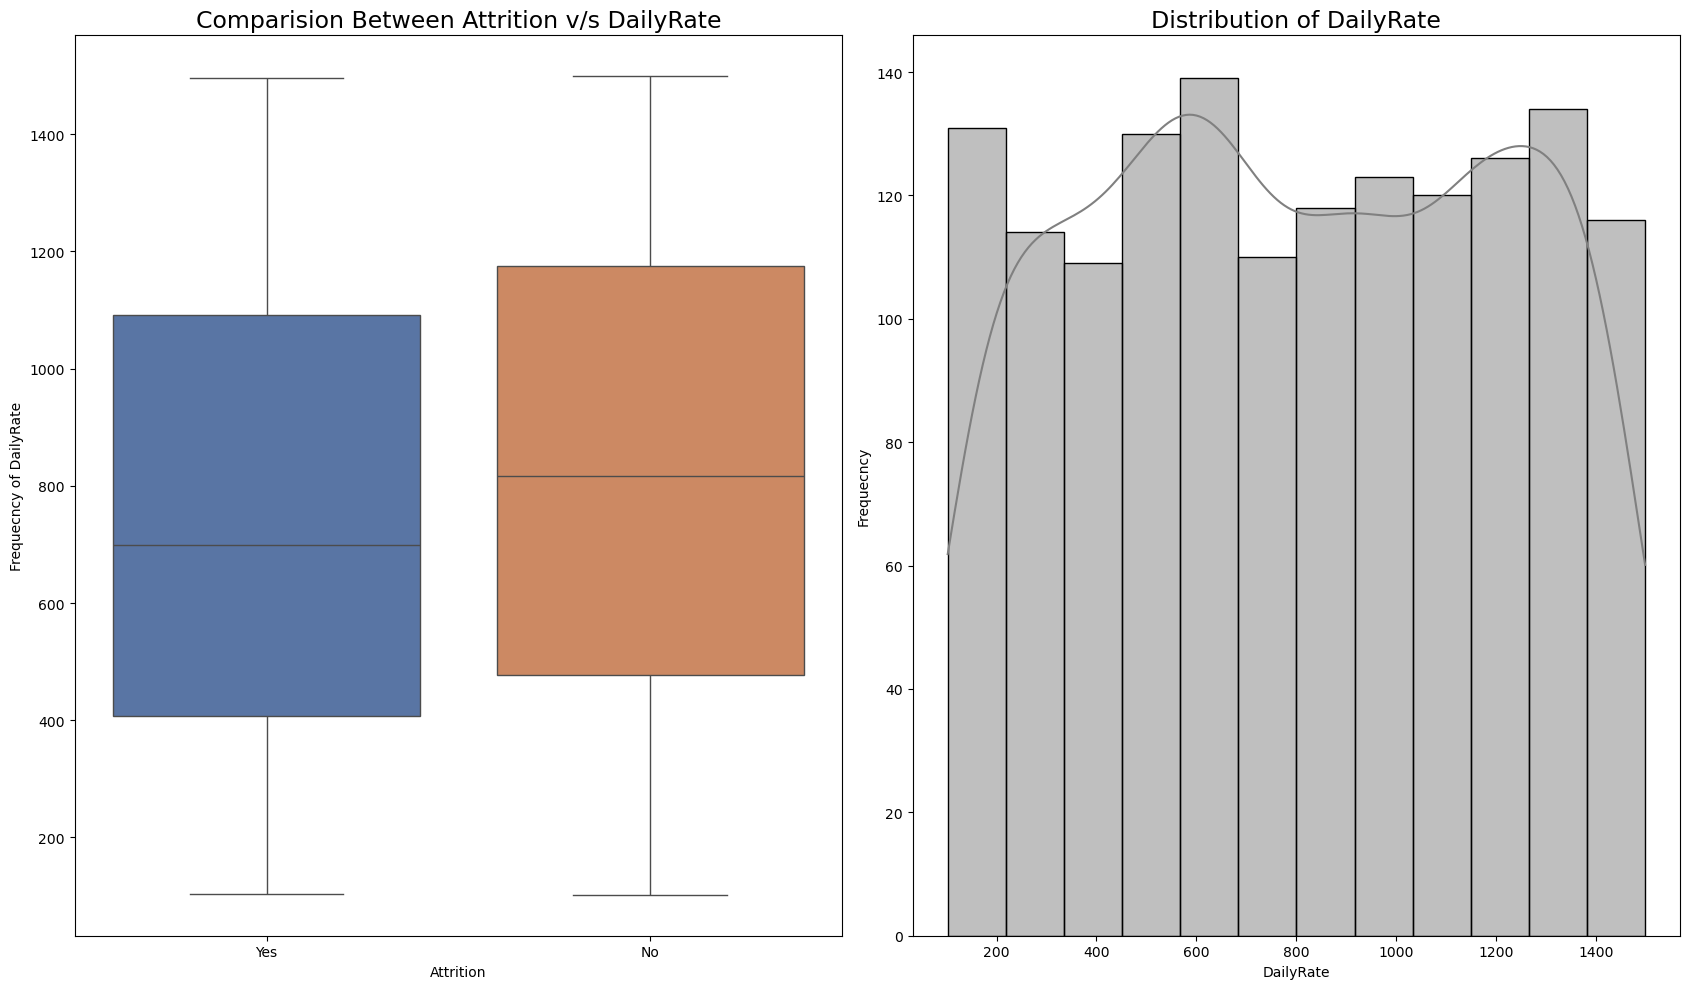

In [55]:
# compares employees daily rate and their nature towards attrition

attrition_comparison_num("Attrition","DailyRate")

- From above boxplot, we can say that employee's with low daily rates are more prone to leaving the company compare to employee's with high daily rates.

- **By Monthly Income**

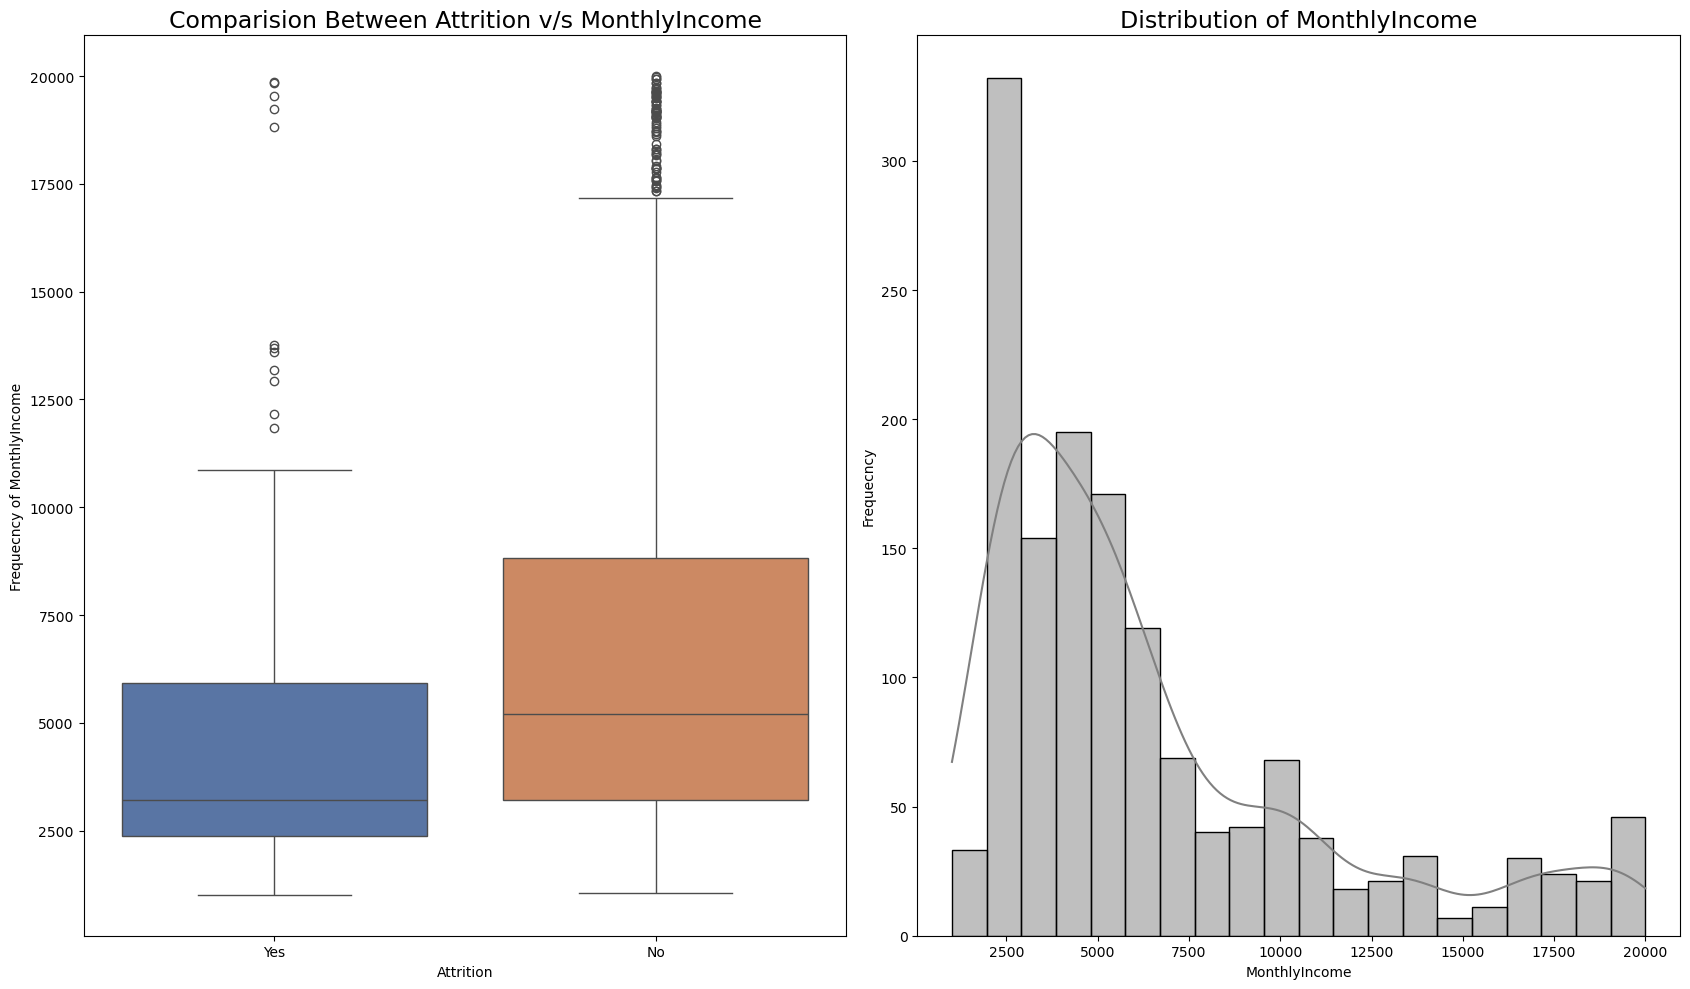

In [58]:
# compares employees monthly income and their nature towards attrition 

attrition_comparison_num("Attrition","MonthlyIncome")

- As we have seen the reason behind in daily rates, the same logic applies here in monthly income.   
- Employee's with low monthly income are more prone to leaving the company compare to employee's with high monthly income.

- **Distance From Home**

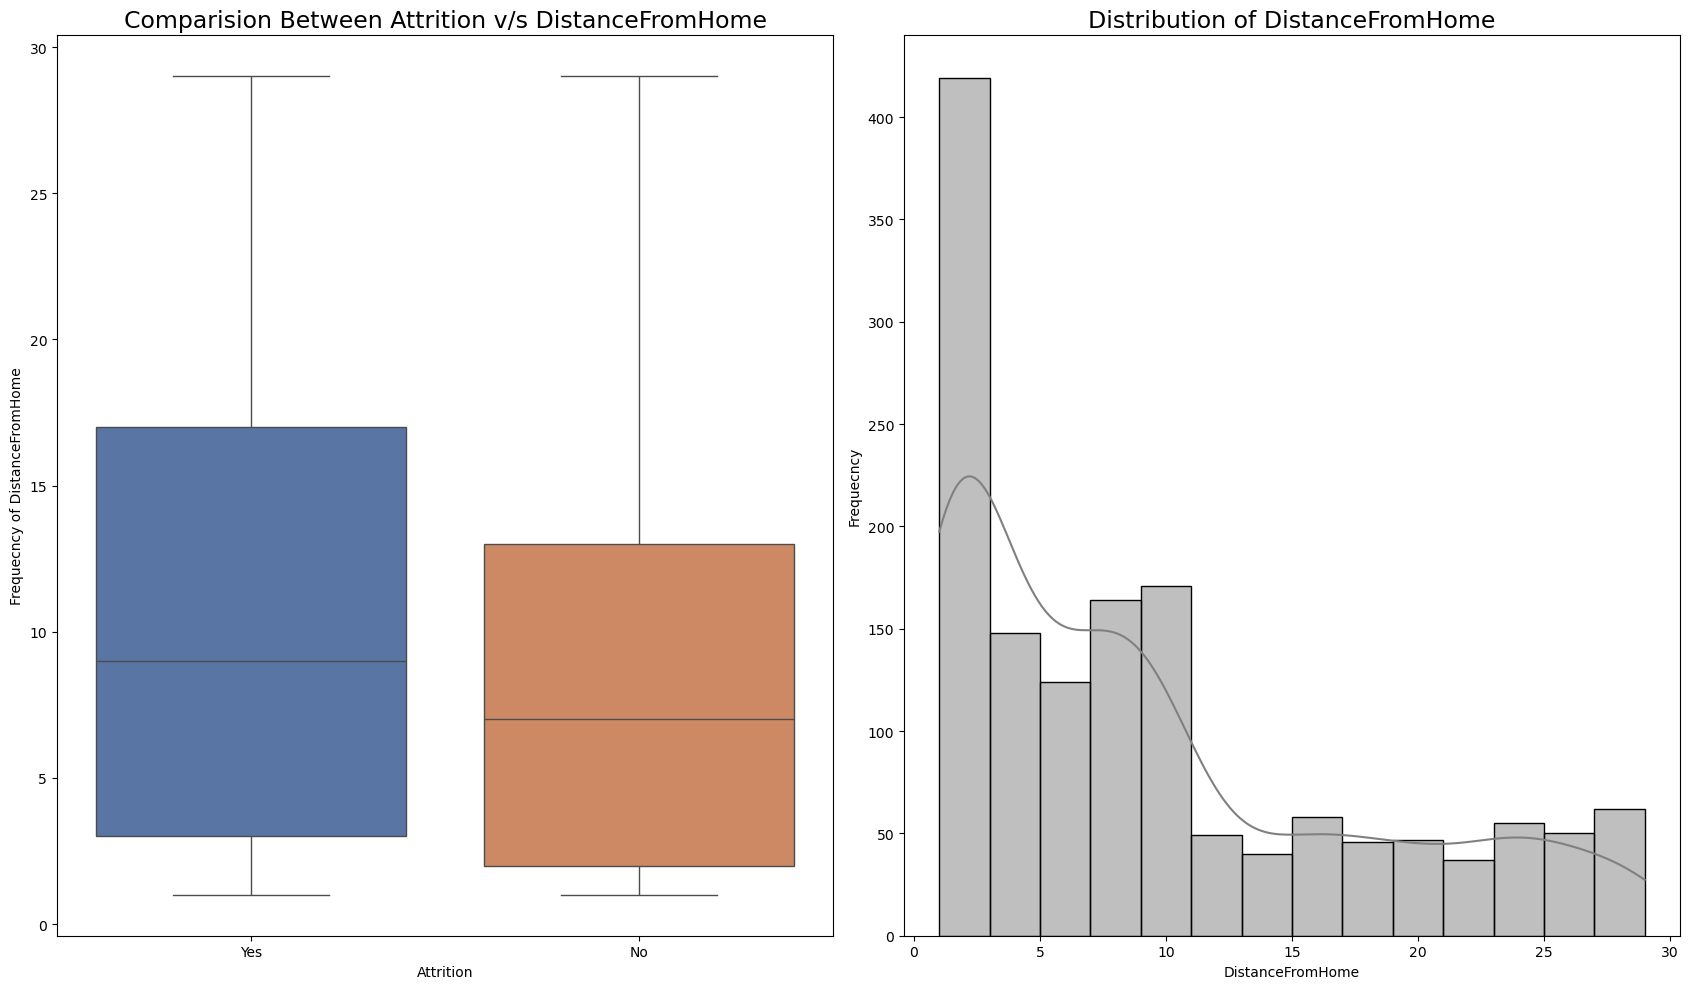

In [61]:
# compares employees office distance from thire home and nature towards attrition 

attrition_comparison_num("Attrition","DistanceFromHome")

- Majorly attrition is done because distance from home, Employee who came far from home is highest number of attrition compare to who came near from home are not leaving the company

- **Percent Salary Hike**

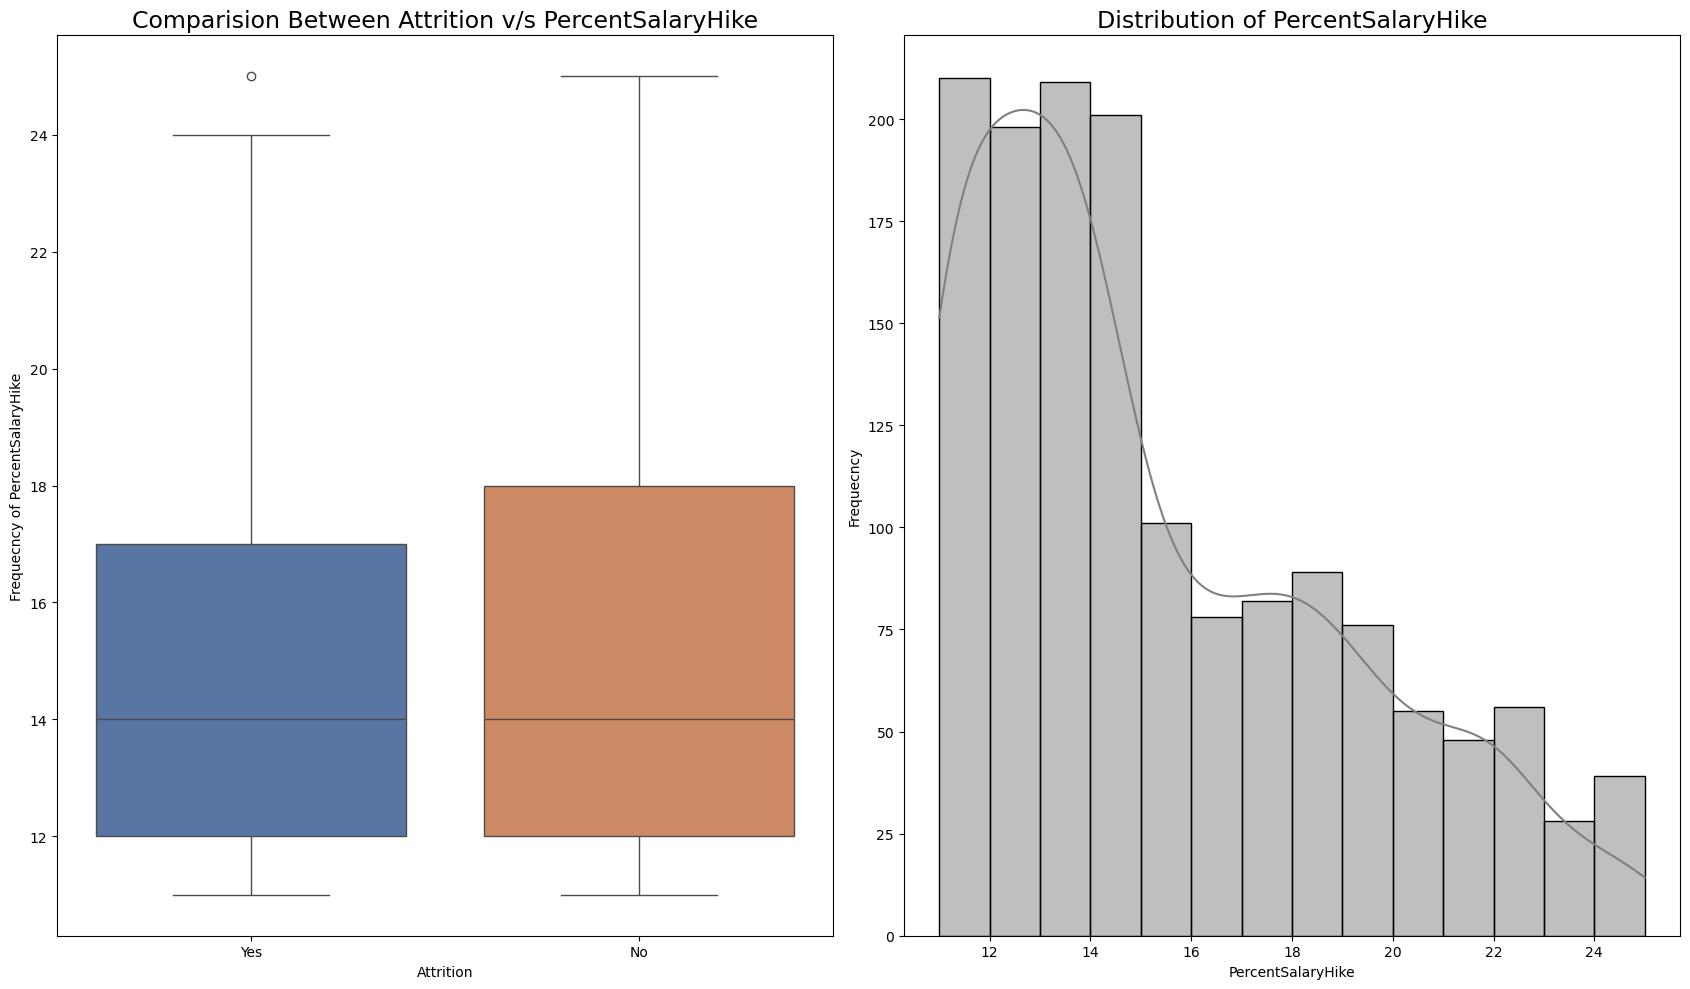

In [64]:
# compares employees salary hike(%) and nature towards their attrition

attrition_comparison_num("Attrition","PercentSalaryHike")

- Around 70-80% of employees are getting good salary hike they didn't leave, rest of all are not getting a good hike those are leave the company.

- **Total Working Years**

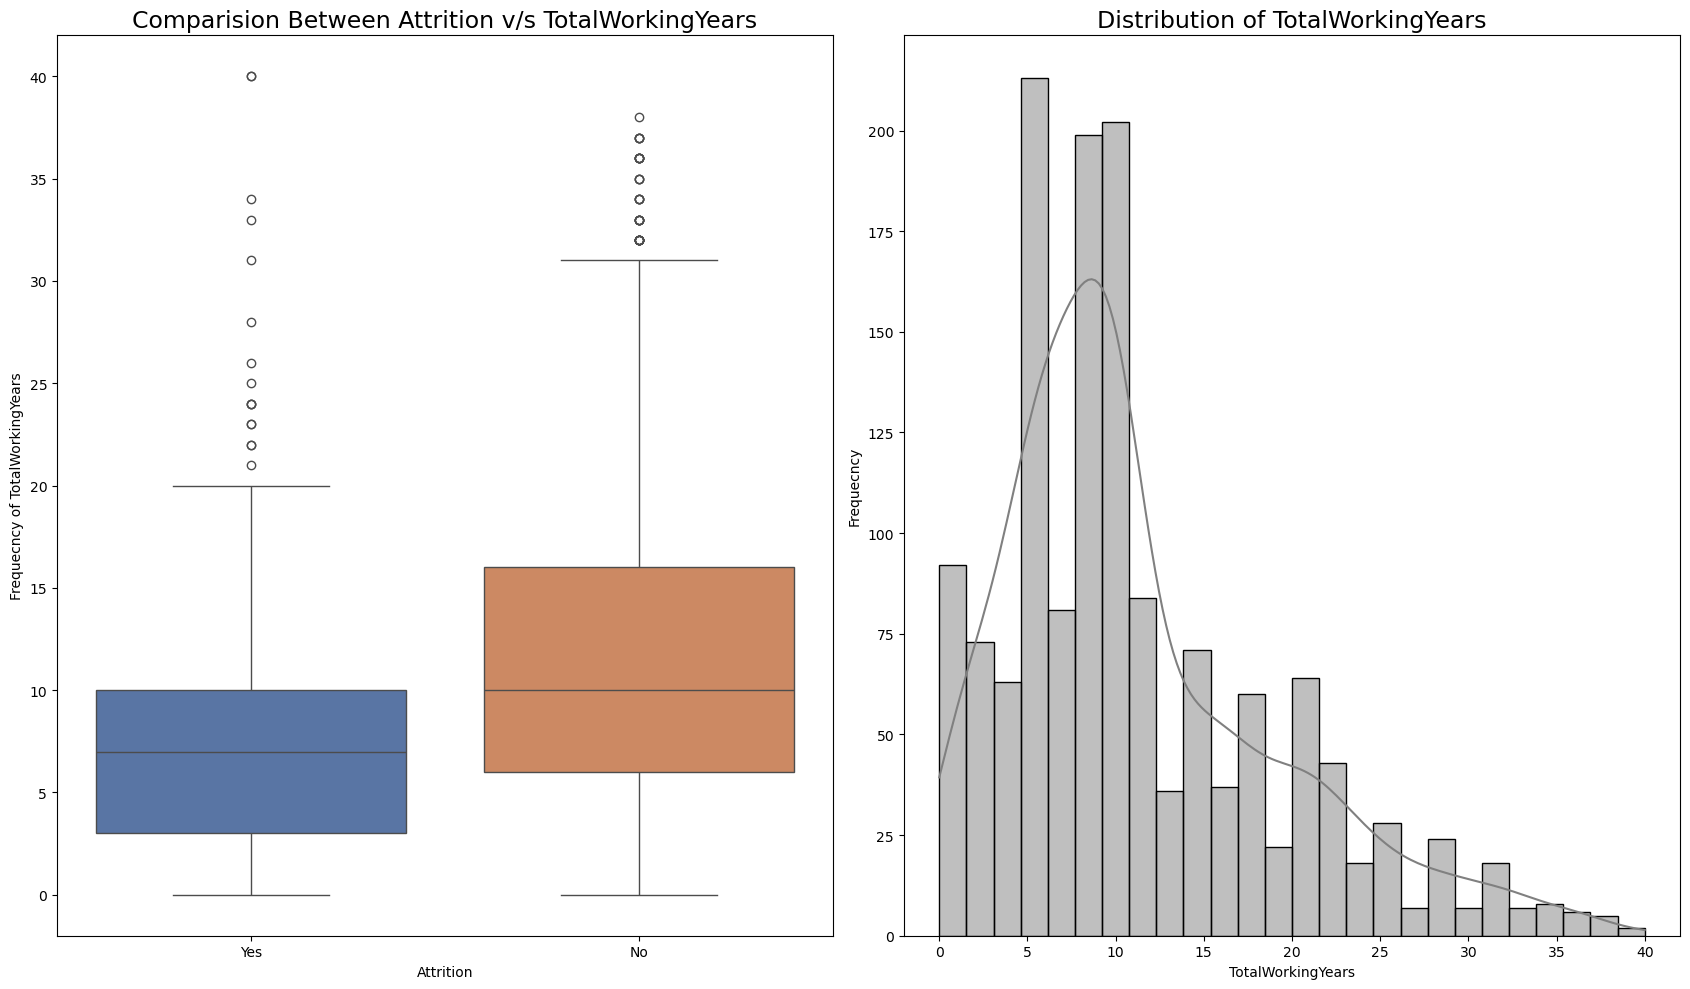

In [67]:
# compares employee's total working years and nature towards their attrition 

attrition_comparison_num("Attrition","TotalWorkingYears")

- Here we can said that form above histogram majority employee's working experience are 0-15 years.
- In terms of working experience boxplot shows less experience employee's are switching the job. 

#### (For Categoricals)

In [70]:
def attrition_comparison_cat(data_col,attrition_col,invert_axis = False):
    
    fig, axes = plt.subplots(1,2,figsize = (15,7))
    
    if invert_axis == False:
        sns.countplot(x = data[data_col],hue = data[attrition_col], ax = axes[0], palette = "deep")
        axes[0].set_xlabel(data_col)
        axes[0].set_ylabel(f"Frequency of {data_col}")
    else: 
        sns.countplot(y = data[data_col],hue = data[attrition_col],ax = axes[0], palette = "deep") 
        axes[0].set_xlabel(f"Frequency of {data_col}")
        axes[0].set_ylabel(data_col)
        
    axes[0].set_title(f"Comparison Between {data_col} v/s {attrition_col}", fontsize = 17)
    plt.tight_layout()
    
    attrition_rate = (data.groupby(data_col)[attrition_col].value_counts(normalize = True)
                      .unstack()* 100)
    
    if invert_axis == False:
        sns.barplot(attrition_rate["Yes"],ax = axes[1], palette = "colorblind")
        axes[1].set_xlabel(data_col)
        axes[1].set_ylabel("Average Rate (in %) of Attriton")
    else:
        sns.barplot(y = attrition_rate["Yes"].index,
                    x = attrition_rate["Yes"].values, ax = axes[1], palette = "colorblind") 
        axes[1].set_xlabel("Average Rate (in %) of Attriton")
        axes[1].set_ylabel(data_col)
        
    axes[1].set_title(f"Attrition Rate (in %) By {data_col}", fontsize = 17)
    plt.tight_layout()
    
    plt.show()

- **Business Travel**

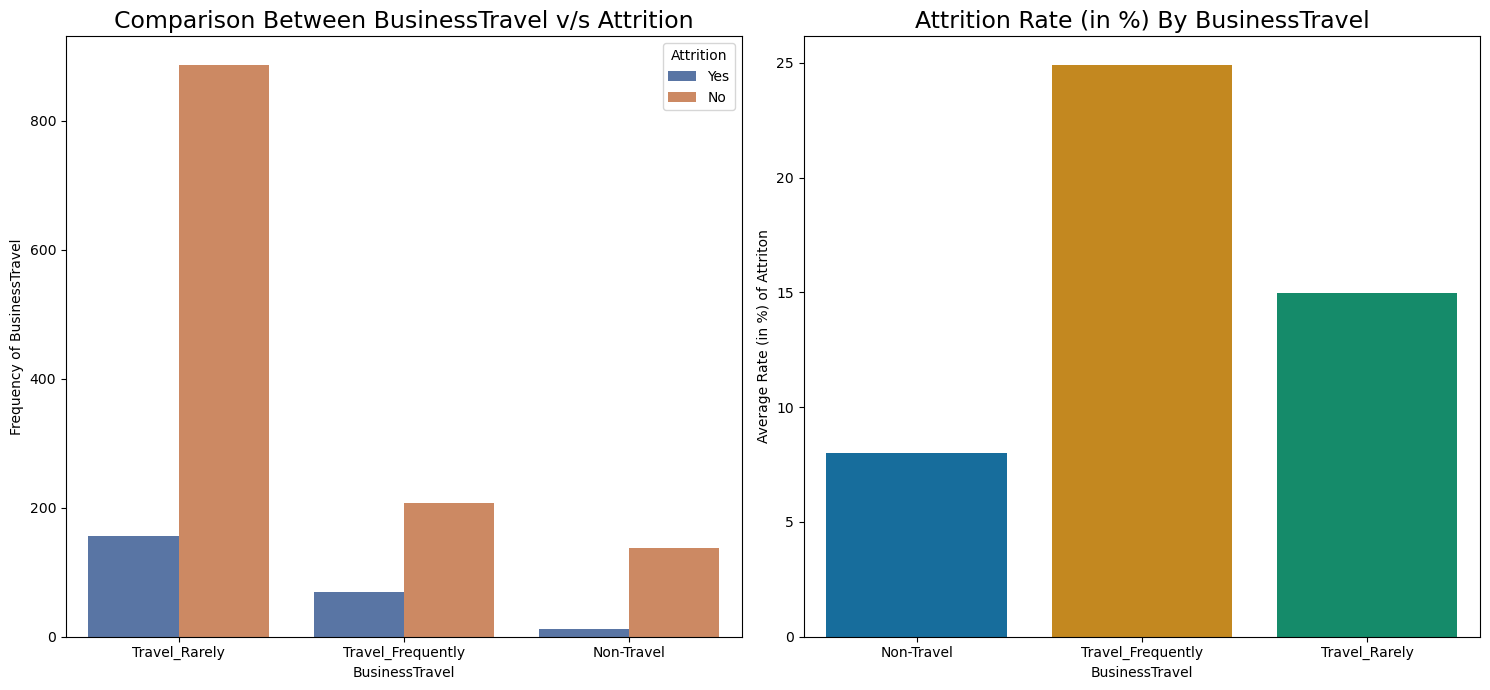

In [72]:
# compare employee's business travel and average attrition rate(in %) 

attrition_comparison_cat("BusinessTravel","Attrition")

- Here, majority of employees's are travel rarely campare to rest of all but the most attriton is done by employees's who travel frequently.
- The average attrition rate of employee's who travel frequently is about 25% 

- **Department**

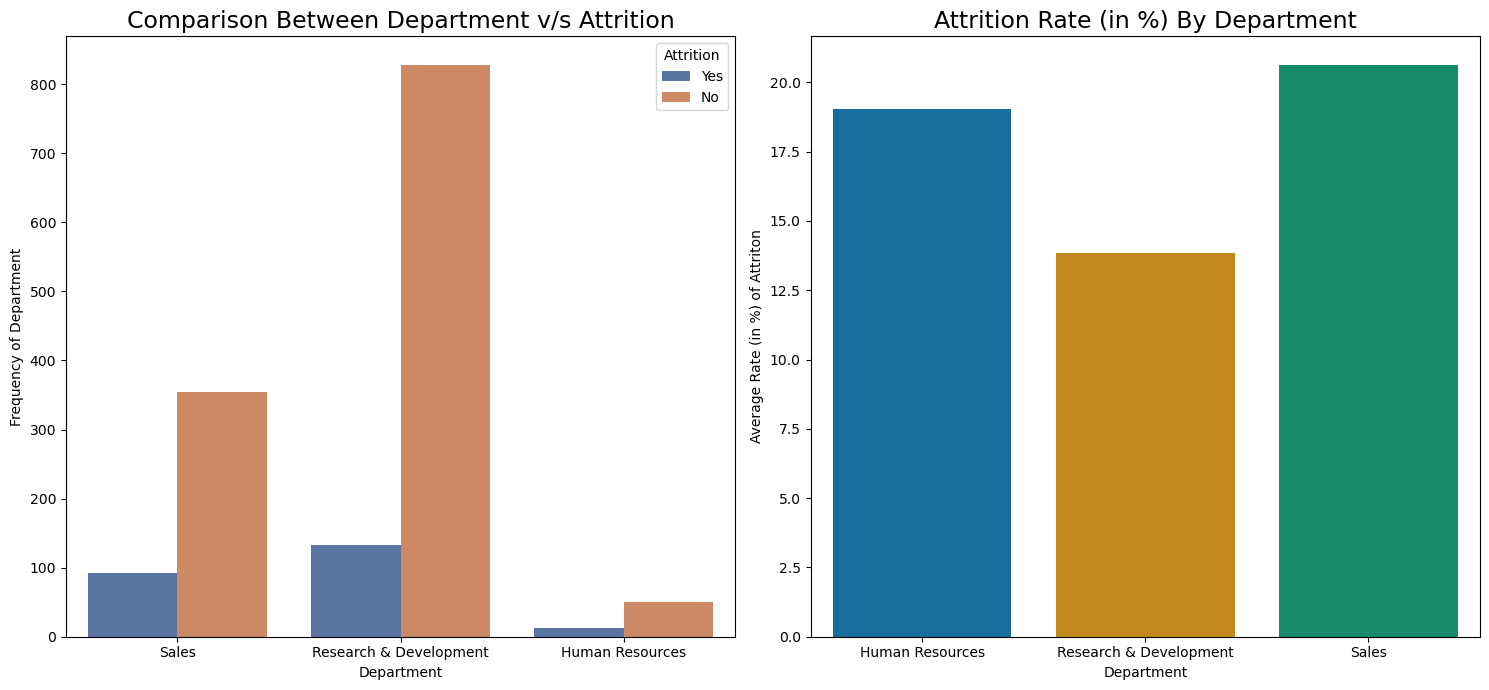

In [75]:
# compare employee's department and average attrition rate(in %)

attrition_comparison_cat("Department","Attrition")

- Here, majority of employees's are from R&D department compare to rest of all but the most attriton is done by where employee's are in sales department.
- The average attrition rate of employee's are in sales department is about ~22% 

- **Education Field**

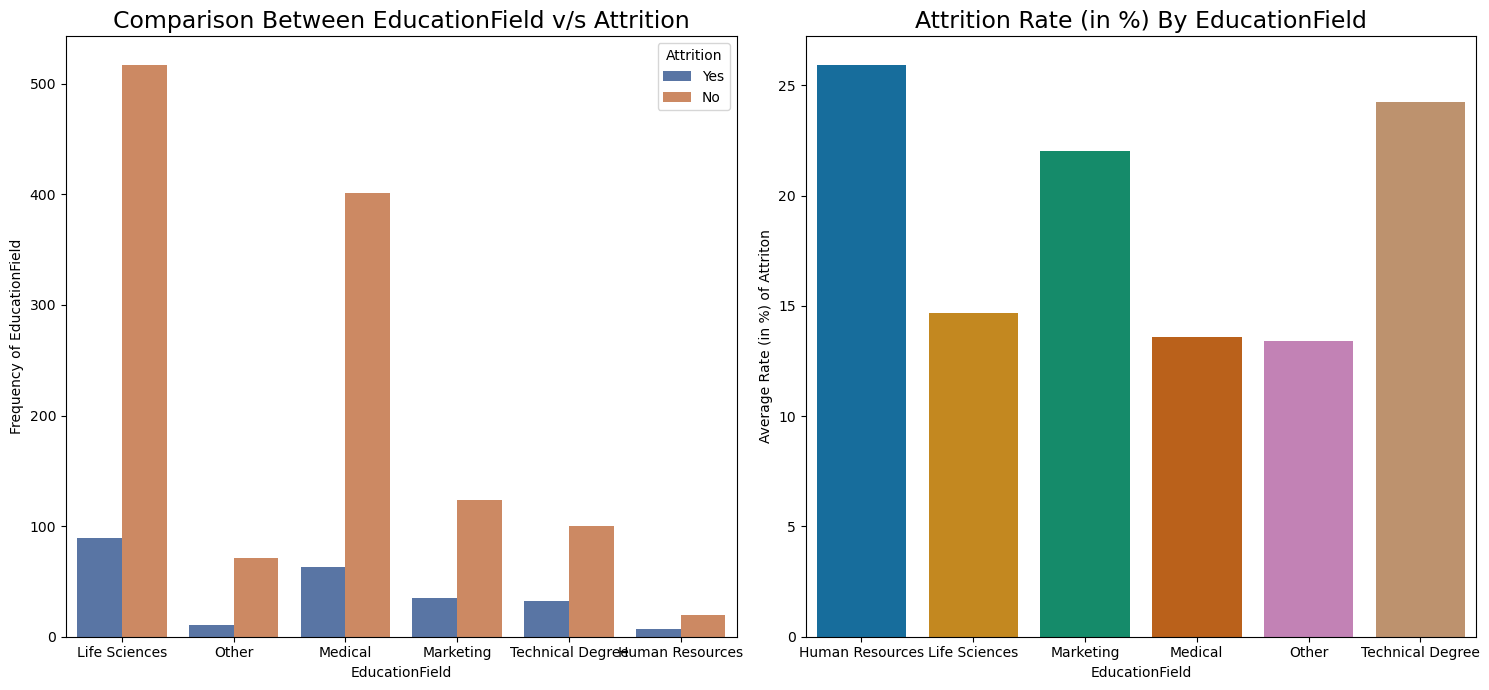

In [78]:
# compare employee's education field and average attrition rate(in %)

attrition_comparison_cat("EducationField","Attrition")

- Here, majority of employees's are in education field of life sciences compare to rest of all but the most attriton is done by where employee's in a field of human resources(HR).
- The average attrition rate of employee's in a education field of human resources is about ~27% 

- **Environment Satisfaction**

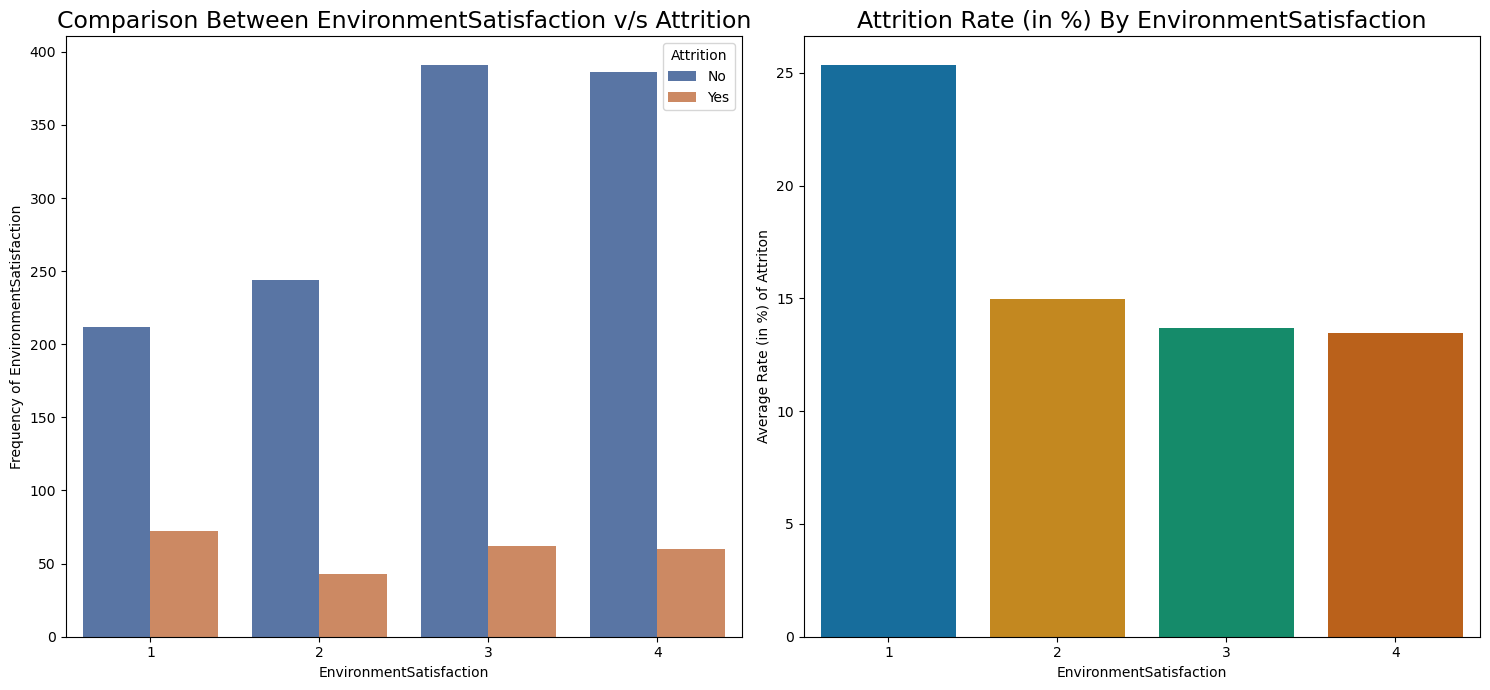

In [81]:
# compare employee's environment satiafaction and average attrition rate(in %)

attrition_comparison_cat("EnvironmentSatisfaction","Attrition")

- Above bar chart clearly shows the employee's low environment satisfaction makes major impact towards attrition. Hence it's average attrition is near by 25%

- **Gender**

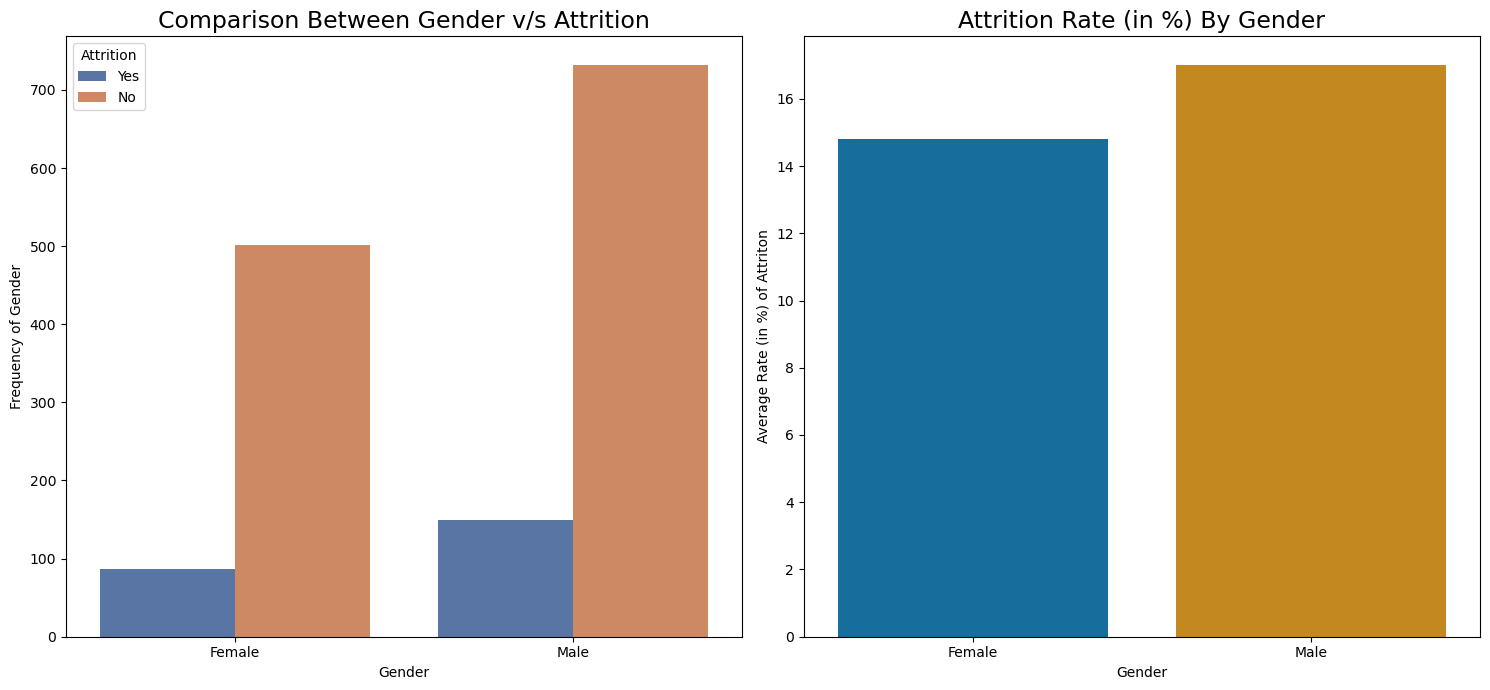

In [84]:
# compare employee's gender and average attrition rate(in %)

attrition_comparison_cat("Gender","Attrition")

- Here, there is no biasedness in gender the average attrition rate is almost equal for both of them.
- Average attrition rate:
    - Male : 17%
    - Female : 15%

- **Marital Status**

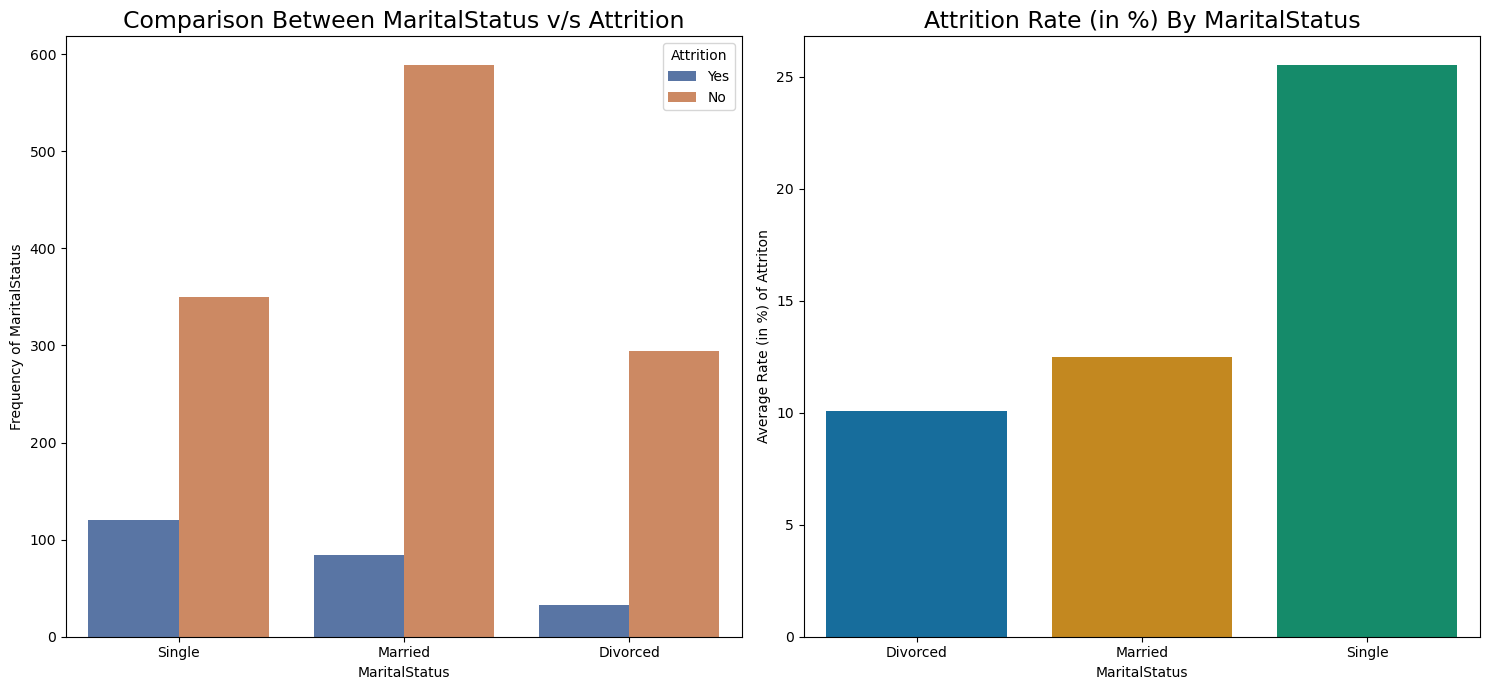

In [87]:
# compare employee's marital status and average attrition rate(in %)

attrition_comparison_cat("MaritalStatus","Attrition")

- Highest attrition rate is 25% for those who are single

- **Job Role**

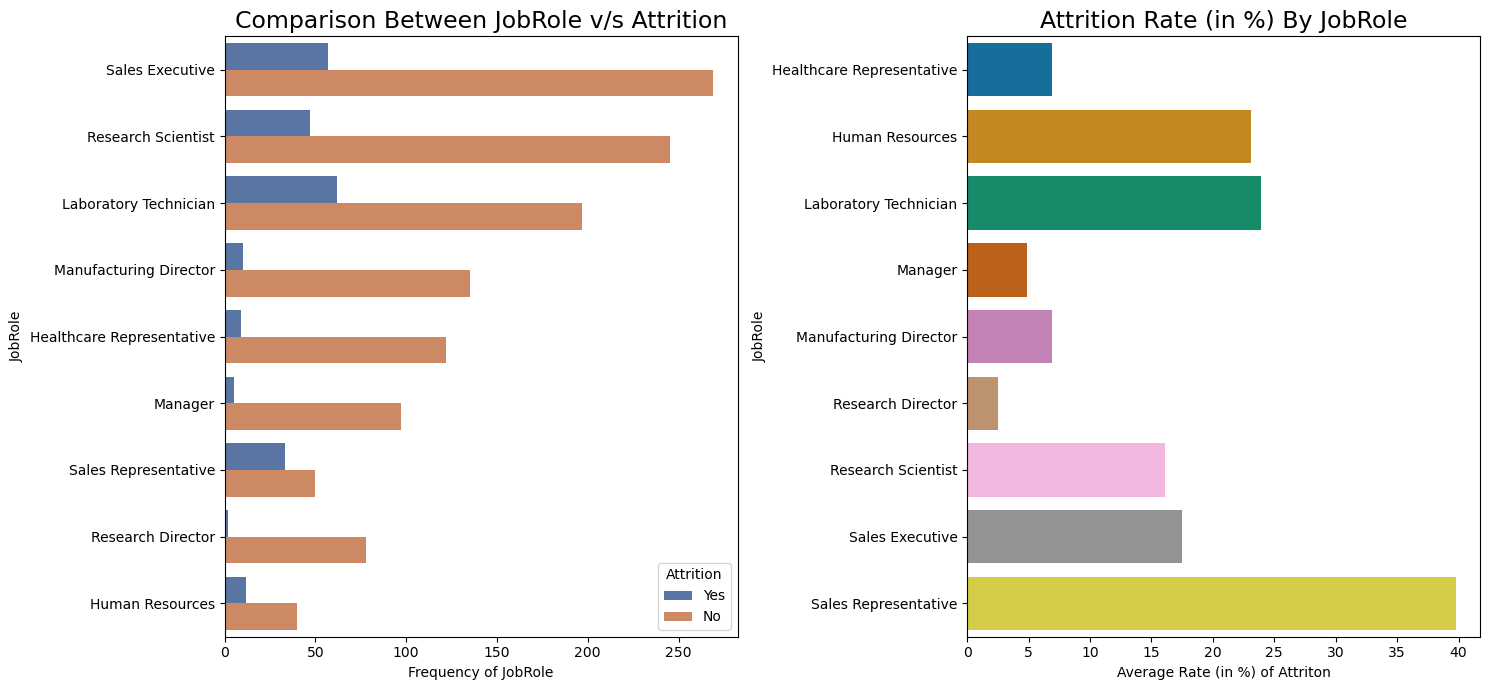

In [90]:
# compare employee's job role and average attrition rate(in %)

attrition_comparison_cat("JobRole","Attrition",invert_axis = True)

- In a specific job role most number of employee's are in sales executive, research scientist and lab.technician.
- Most attrition in a specific job role is sales representative, lab.technician and human resources. Their average attrition -> 40%, 24% and 23%

- **Job Involvement**

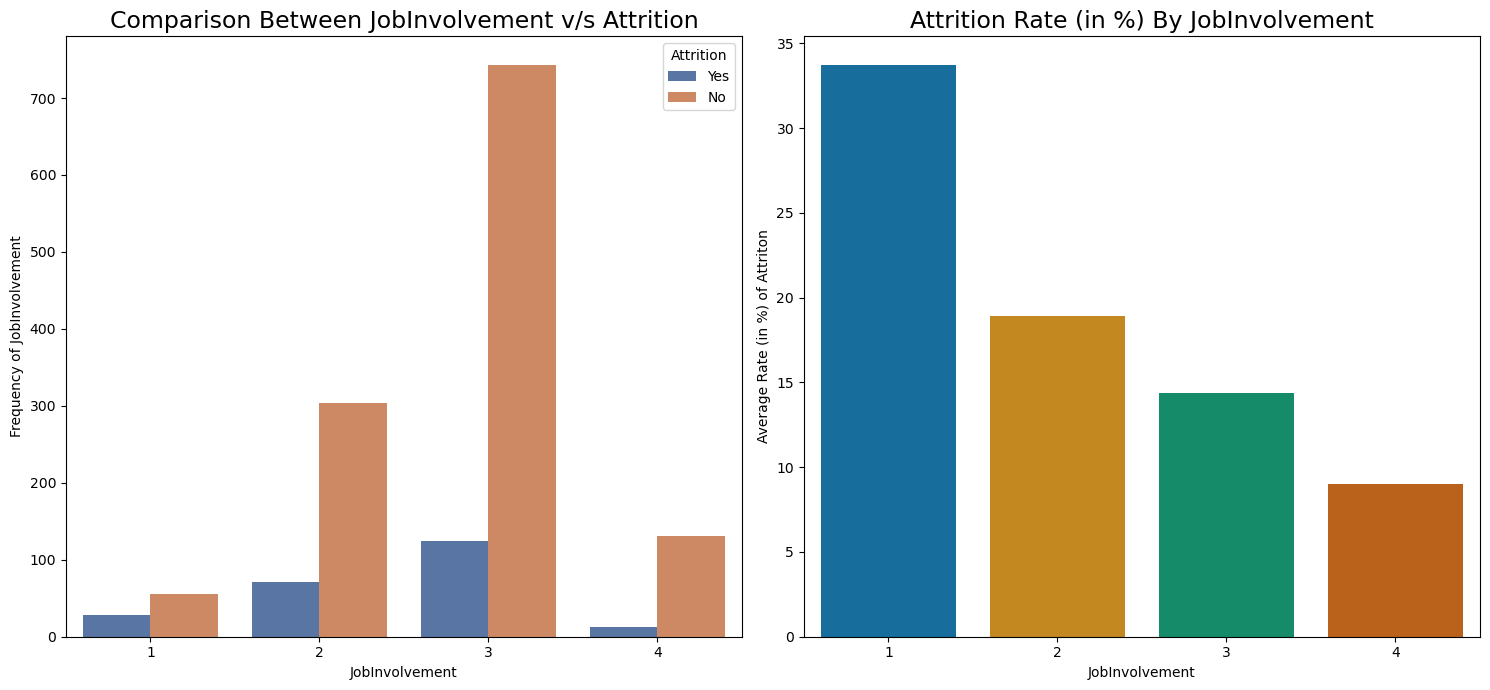

In [93]:
# compare employee's job involvement and average attrition rate(in %)

attrition_comparison_cat("JobInvolvement","Attrition")

- Employee's with low job involvement has the highest attrition rate which is ~34%

- **Job Satisfaction**

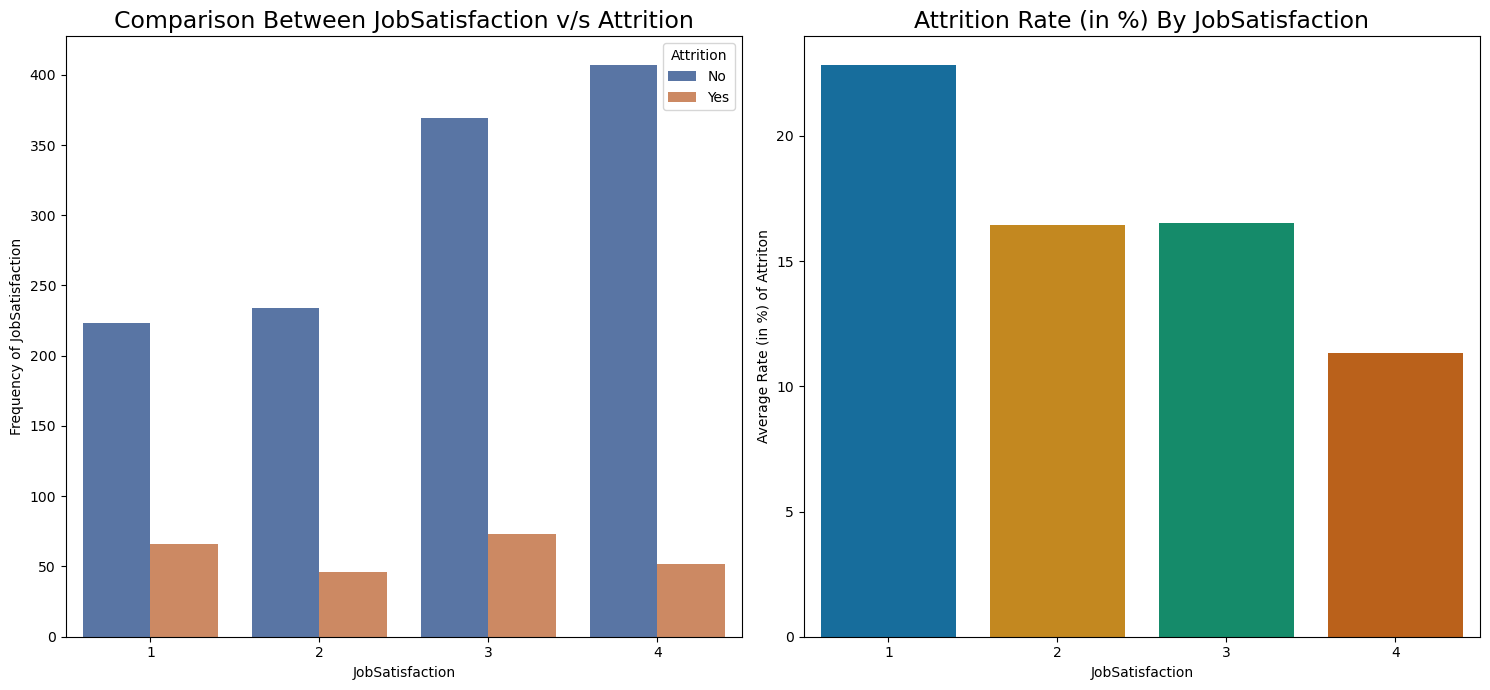

In [96]:
# compare employee's job satisfaction and average attrition rate(in %)

attrition_comparison_cat("JobSatisfaction","Attrition")

- Employee's who have low job satisfaction is highest to leave the company and their attrition rate is ~25%.
- Even medium, high and very high categories for job satisfaction has a range of ~12-17% attrition rate.

- **Relationship Satisfaction**

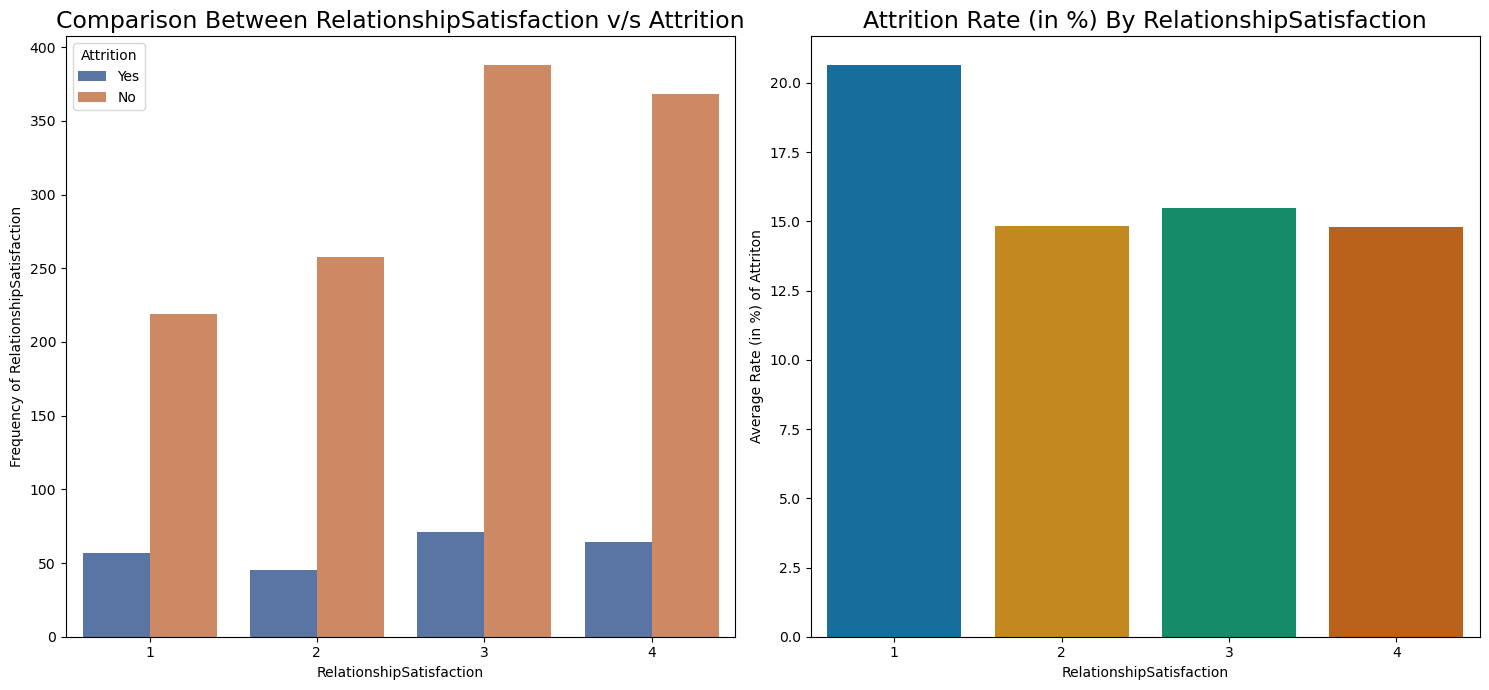

In [99]:
# compare employee's relationship satisfaction and average attrition rate(in %)

attrition_comparison_cat("RelationshipSatisfaction","Attrition")

- Employee's relationship satisfaction is almost same among all the criteria. The range of attrition is between 15-20%  

- **Work Life Balance**

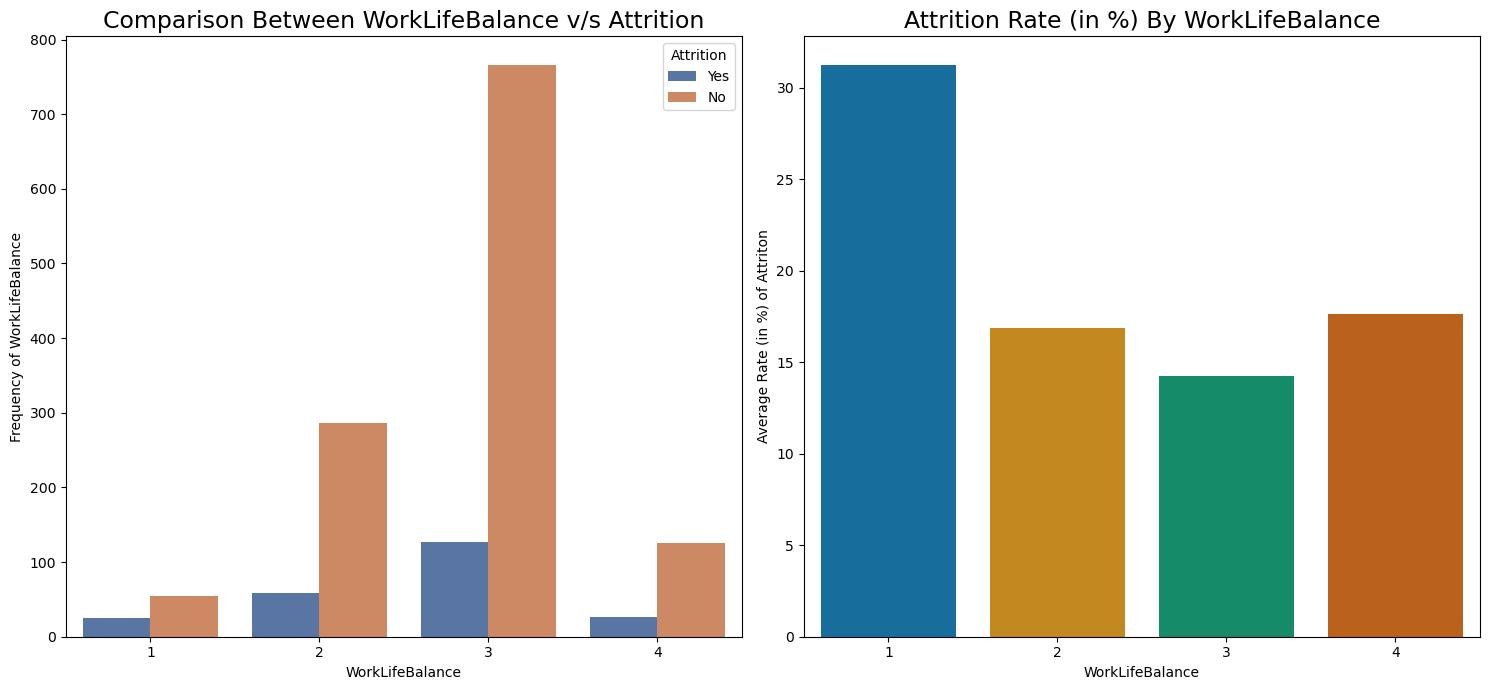

In [102]:
# compare employee's work life balance and average attrition rate(in %)

attrition_comparison_cat("WorkLifeBalance","Attrition")

- Bad work life balance is the major of reason employee's attrition.
- Here, More than 30% attrition is responsible for bad work life balance.  

- **Performance Rating**

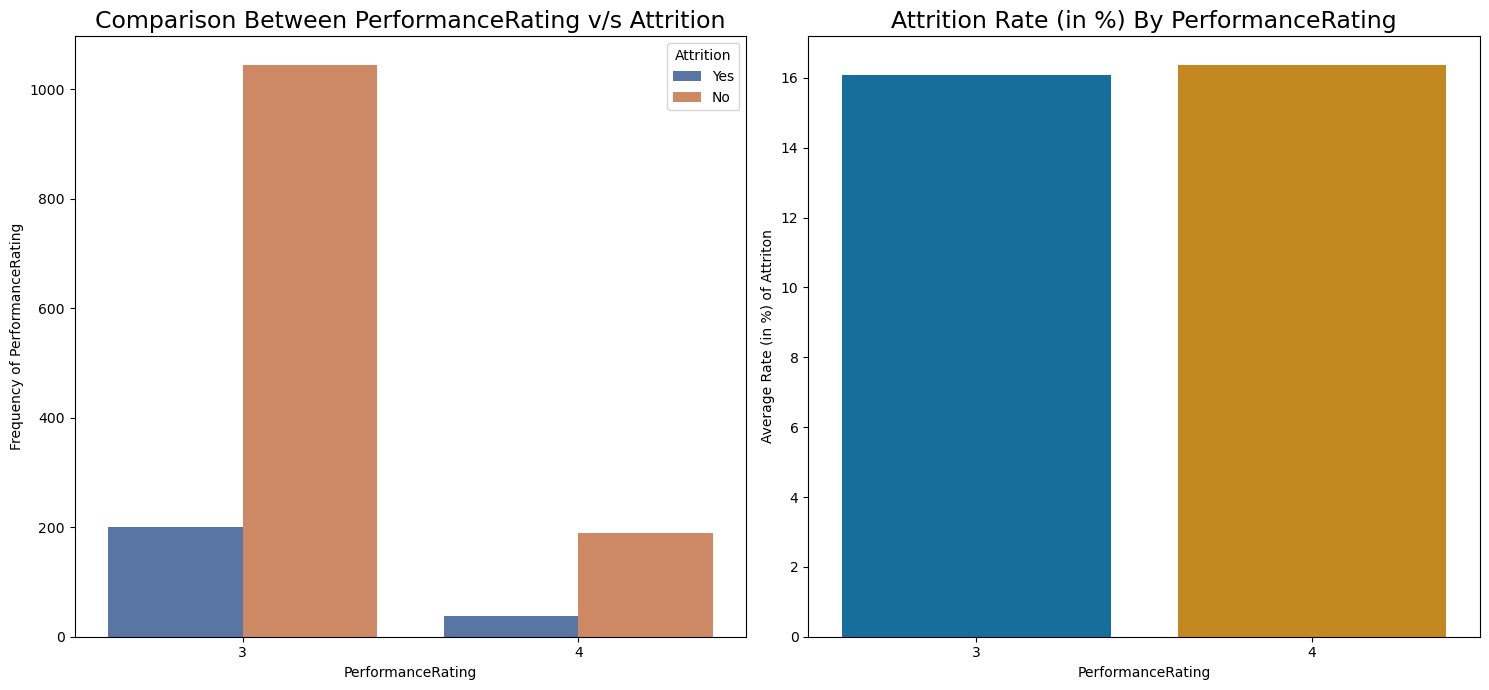

In [105]:
# compare employee's performance rating and average attrition rate(in %)

attrition_comparison_cat("PerformanceRating","Attrition")

- In performance rating from above graphs we can said that there no significant difference in employee's performance rating.

## Feature Engineering

In [108]:
data_model = data.copy()
data_model.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [109]:
# encoding for attrition column

data_model["Attrition"] = data_model["Attrition"].map({"Yes":1,"No":0})

In [110]:
# dropping few columns that are not useful for modeling

data_model = data_model.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

In [111]:
# Encoding for categorical columns

label_enc = LabelEncoder()

for col in data_model.select_dtypes(include = "object").columns:
    data_model[col] = label_enc.fit_transform(data_model[col])

In [112]:
# encoded
data_model.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


## Modeling
#### Random Forest Classifier

In [114]:
# assigning independent and dependent columns ; features and target column

X = data_model.drop("Attrition",axis = 1)
y = data_model["Attrition"]

# splitting the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 77, stratify = y)

In [115]:
# Applying the model
rf = RandomForestClassifier(n_estimators = 200, random_state = 77)

# model fitting (train)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=77)

In [116]:
# predictions
y_pred = rf.predict(X_test)

In [117]:
# checking accuracy

accuracy_score(y_test,y_pred)

0.8639455782312925

- Here our model is well fitted and giving ``86% of accuracy`` for predicting attrition.

## Evaluation

In [120]:
# Evaluate: precision , recall , f1-score for predicted attrition 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       247
           1       0.82      0.19      0.31        47

    accuracy                           0.86       294
   macro avg       0.84      0.59      0.62       294
weighted avg       0.86      0.86      0.83       294



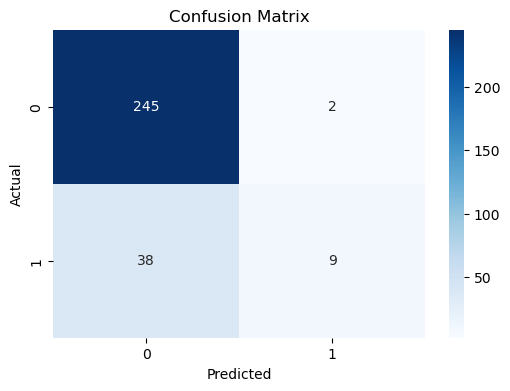

In [121]:
# Plotting confusion matrix : For actual v/s predictd attrition

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

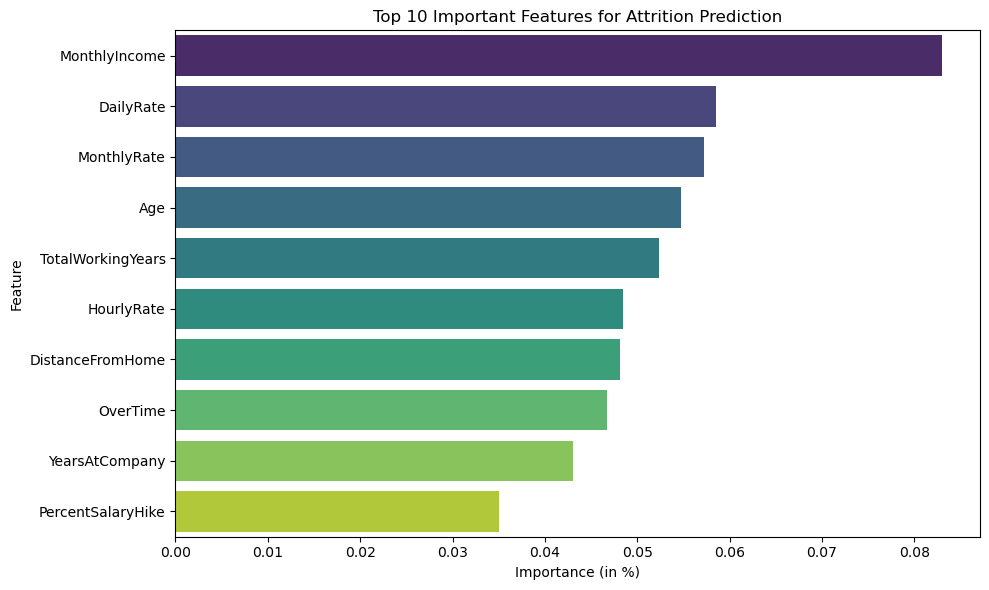

In [122]:
# plotting top-10 important feature for attrition 

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances.index[:10], palette='viridis')
plt.title("Top 10 Important Features for Attrition Prediction")
plt.xlabel("Importance (in %)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Business Insights:

- **Low income** and **excessive overtime** are key drivers of attrition.

- **Improving work-life balance** and **recognizing employee performance** could help reduce turnover.

- HR teams should focus on **career growth opportunities** and **satisfaction programs** for employees early in their career (<5 years).

- Predictive model can help **identify at-risk employees early** for retention strategies.